### Temperature Forecast Project using ML
###### Problem Statement: Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

##### Attribute Information:



- station - used weather station number: 1 to 25
- Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
- Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
- LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- lat - Latitude (Â°): 37.456 to 37.645
- lon - Longitude (Â°): 126.826 to 127.135
- DEM - Elevation (m): 12.4 to 212.3
- Slope - Slope (Â°): 0.1 to 5.2
- Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
- Please note that there are two target variables here:

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day minimum temperature

# Importing data set

In [84]:
#importing necessary liraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings ('ignore')

In [85]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
data

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [86]:
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [87]:
data.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

The aboves result shows 10 randomly samples, five top rows and five last rows of the data and they are all numerical data. Data rows contains 7752 rows and 27 columns.We can observed zero values and nans values in some columns. However two columns which are target variables are  continous data. Therefore the problem statement is a regression problem.  

In [88]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

columns names of the data set. Collectively shows as objects data types

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


According to the information of the data set, RangeIdex is 7752, data types, 24 columns contains float and I object data, memory usage 1.5+ MB

In [90]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

According to the above result shwoing confirmationof the data types in each columns we can see that 28 columns are float data expect that of the data columns which is object data

In [91]:
# Checking nana values 
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

The above result shows the total sum of nans values in each columns. 

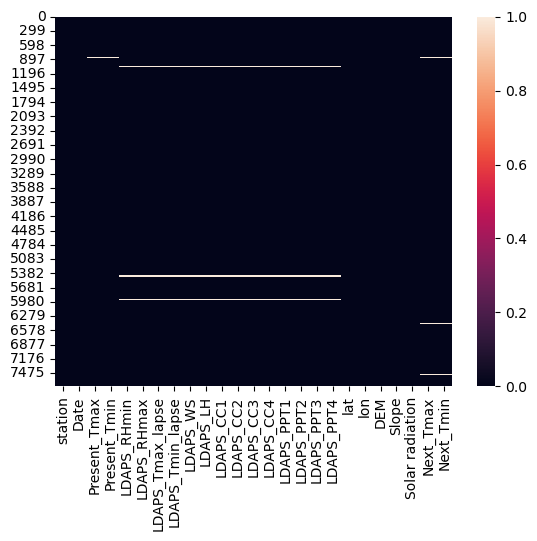

In [92]:
#checking nans values using heatmap
plt.figure()
sns.heatmap(data.isnull())
plt.show()

This confirm there are nulls values. 

In [93]:
# Checking unique values of each columns 
for i in  data:
    print(data[i].nunique)
    print('\n')

<bound method IndexOpsMixin.nunique of 0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
7747    23.0
7748    24.0
7749    25.0
7750     NaN
7751     NaN
Name: station, Length: 7752, dtype: float64>


<bound method IndexOpsMixin.nunique of 0       30-06-2013
1       30-06-2013
2       30-06-2013
3       30-06-2013
4       30-06-2013
           ...    
7747    30-08-2017
7748    30-08-2017
7749    30-08-2017
7750           NaN
7751           NaN
Name: Date, Length: 7752, dtype: object>


<bound method IndexOpsMixin.nunique of 0       28.7
1       31.9
2       31.6
3       32.0
4       31.4
        ... 
7747    23.3
7748    23.3
7749    23.2
7750    20.0
7751    37.6
Name: Present_Tmax, Length: 7752, dtype: float64>


<bound method IndexOpsMixin.nunique of 0       21.4
1       21.6
2       23.3
3       23.4
4       21.9
        ... 
7747    17.1
7748    17.7
7749    17.4
7750    11.3
7751    29.9
Name: Present_Tmin, Length: 7752, dtype: float64>


<bound metho

In [94]:
# Checking values counts of each columns 
for i in  data:
    print(data[i].value_counts)
    print('\n')

<bound method IndexOpsMixin.value_counts of 0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
7747    23.0
7748    24.0
7749    25.0
7750     NaN
7751     NaN
Name: station, Length: 7752, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0       30-06-2013
1       30-06-2013
2       30-06-2013
3       30-06-2013
4       30-06-2013
           ...    
7747    30-08-2017
7748    30-08-2017
7749    30-08-2017
7750           NaN
7751           NaN
Name: Date, Length: 7752, dtype: object>


<bound method IndexOpsMixin.value_counts of 0       28.7
1       31.9
2       31.6
3       32.0
4       31.4
        ... 
7747    23.3
7748    23.3
7749    23.2
7750    20.0
7751    37.6
Name: Present_Tmax, Length: 7752, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0       21.4
1       21.6
2       23.3
3       23.4
4       21.9
        ... 
7747    17.1
7748    17.7
7749    17.4
7750    11.3
7751    29.9
Name: Present_Tmin, Length: 7752, dtype: flo

No balnks spaces and duplicates values

# Exploratory Data Analysis(EDA)

## Data Manipulation Preprocessing

Converting the  date column from object to data format. 

In [95]:
data['Date'] = pd.to_datetime(data.Date, format = '%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

The date format has changed to datetime64

 Treating missing values with fillna, instead of dropping them it will be risky but fillna is safer. 

In [96]:
# using fillna to treat missing values
data['station'] =data['station'].fillna(data['station'].mean())
data['Date'] =data['Date'].fillna(data['Date'].median())
data['Present_Tmax'] = data['Present_Tmax'].fillna(data['Present_Tmax'].mean())
data['Present_Tmin'] = data['Present_Tmin'].fillna(data['Present_Tmin'].mean())
data['LDAPS_RHmin'] = data['LDAPS_RHmin'].fillna(data['LDAPS_RHmin'].mean())
data['LDAPS_RHmax'] = data['LDAPS_RHmax'].fillna(data['LDAPS_RHmax'].mean())
data['LDAPS_WS'] = data['LDAPS_WS'].fillna(data['LDAPS_WS'].mean())
data['LDAPS_LH'] = data['LDAPS_LH'].fillna(data['LDAPS_LH'].mean())
data['LDAPS_CC1'] = data['LDAPS_CC1'].fillna(data['LDAPS_CC1'].mean())
data['LDAPS_CC2'] = data['LDAPS_CC2'].fillna(data['LDAPS_CC2'].mean())
data['LDAPS_CC3'] = data['LDAPS_CC3'].fillna(data['LDAPS_CC3'].mean())
data['LDAPS_CC4'] = data['LDAPS_CC4'].fillna(data['LDAPS_CC4'].mean())
data['LDAPS_PPT1'] = data['LDAPS_PPT1'].fillna(data['LDAPS_PPT1'].mean())
data['LDAPS_PPT2'] = data['LDAPS_PPT2'].fillna(data['LDAPS_PPT2'].mean())
data['LDAPS_PPT3'] = data['LDAPS_PPT3'].fillna(data['LDAPS_PPT3'].mean())
data['Next_Tmax'] = data['Next_Tmax'].fillna(data['Next_Tmax'].mean())
data['Next_Tmin'] = data['Next_Tmin'].fillna(data['Next_Tmin'].mean())
data['LDAPS_PPT4'] = data['LDAPS_PPT4'].fillna(data['LDAPS_PPT4'].mean())
data['LDAPS_Tmax_lapse'] = data['LDAPS_Tmax_lapse'].fillna(data['LDAPS_Tmax_lapse'].mean())
data['LDAPS_Tmin_lapse'] = data['LDAPS_Tmin_lapse'].fillna(data['LDAPS_Tmin_lapse'].mean())

data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Nulls values has been treated. lets check the data descriptive summary 

In [97]:
# Statistical summary of the data 
data.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.261185  ...     1.754258     1.156174     1.200364     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148321  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.320110  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571696  ...     0.024276     0.009697     0.000693    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.122557   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932220  
std       2.483276  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

According to the statistical summary of the data the count values in all columns are same. The mean and std don't look good in some columns, probably because of the presence of zeros values in some columns which might affect the data distribution. That will be treated. Min, q1,q2 values are same because of zeros values again present in columns like 'LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'.In this same columns am observing outliers because the Max values is fear beyond the 75% quantile. Longitude column the 75% quantile and Max values are alomst same which can cause outliers. For Dem column the Max values is beyond the 75% quantile which can cause outliers. Again am observing outliers in LDAPS_LH the Max is far beyond the q3.  

# Replacing zero values with the mean of the column. 


In [98]:
data['LDAPS_CC1']=data['LDAPS_CC1'].replace(0,data['LDAPS_CC1'].mean())
data['LDAPS_PPT2']=data['LDAPS_PPT2'].replace(0,data['LDAPS_PPT2'].mean())
data['LDAPS_PPT3']=data['LDAPS_PPT3'].replace(0,data['LDAPS_PPT3'].mean())
data['LDAPS_CC1']=data['LDAPS_CC1'].replace(0,data['LDAPS_CC1'].mean())
data['LDAPS_PPT4']=data['LDAPS_PPT4'].replace(0,data['LDAPS_PPT4'].mean())

data.describe()


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.373911  ...     0.807274     0.468188     0.469273    37.544722   
std       0.257480  ...     1.678459     1.117039     1.160633     0.050352   
min       0.000002  ...     0.000014     0.000021     0.000017    37.456200   
25%       0.159668  ...     0.485003     0.278200     0.269407    37.510200   
50%       0.331365  ...     0.485003     0.278200     0.269407    37.550700   
75%       0.571696  ...     0.485003     0.278200     0.269407    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.122557   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932220  
std       2.483276  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

# Data Visualization 



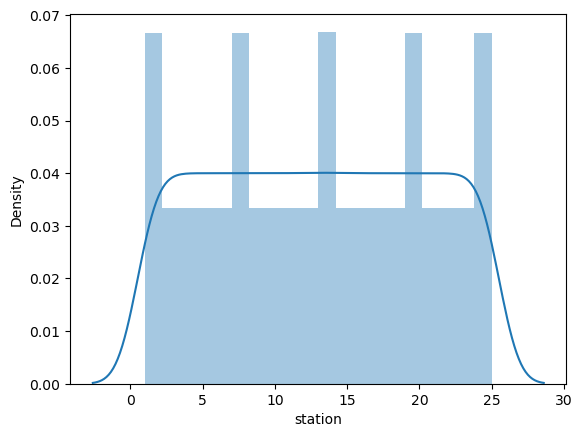

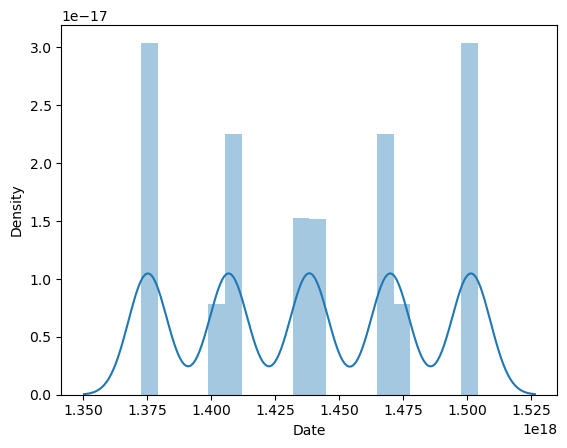

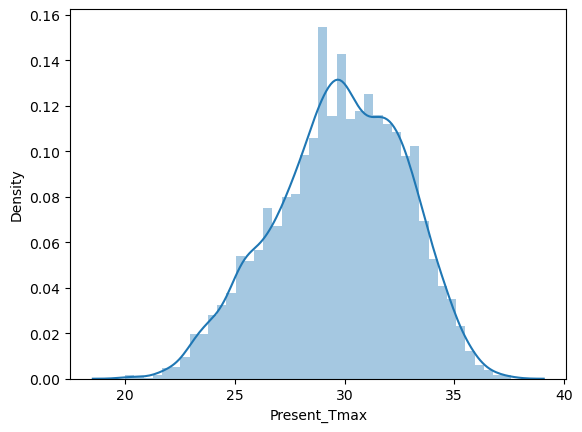

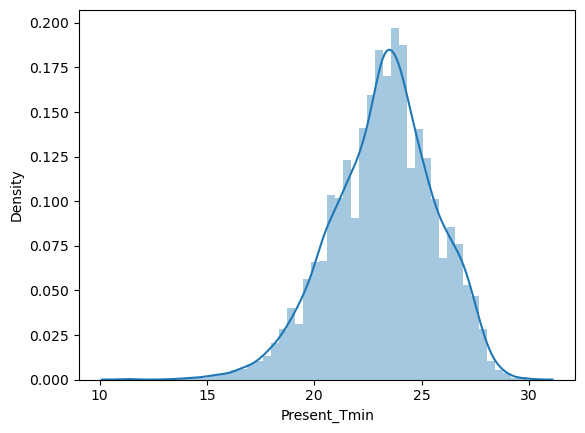

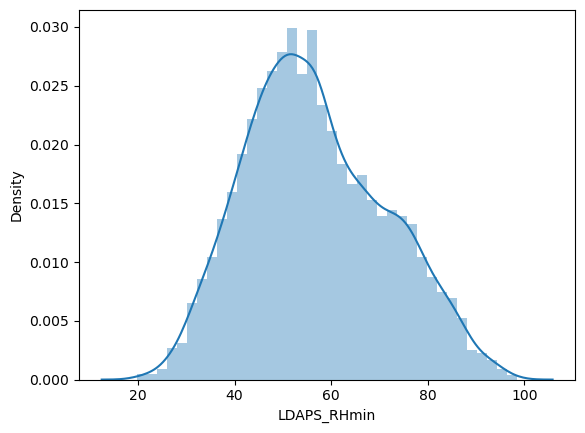

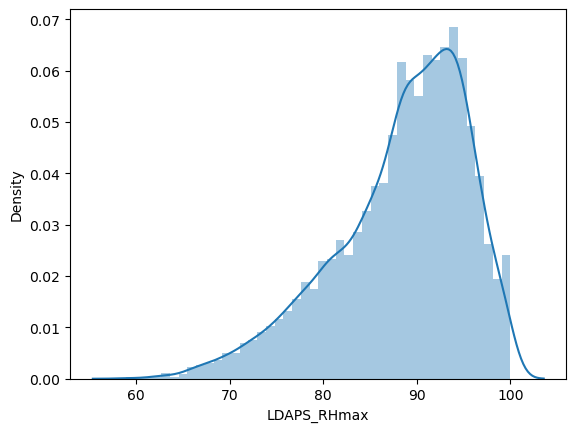

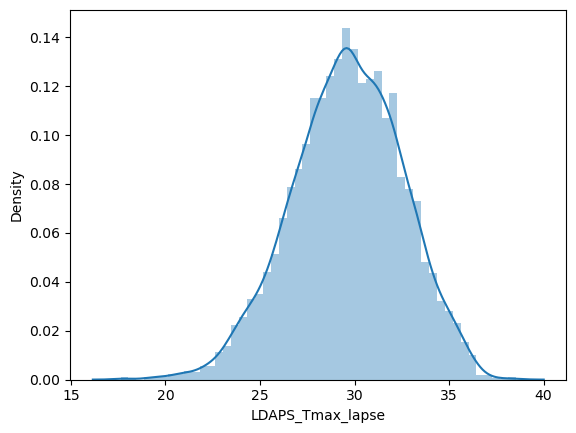

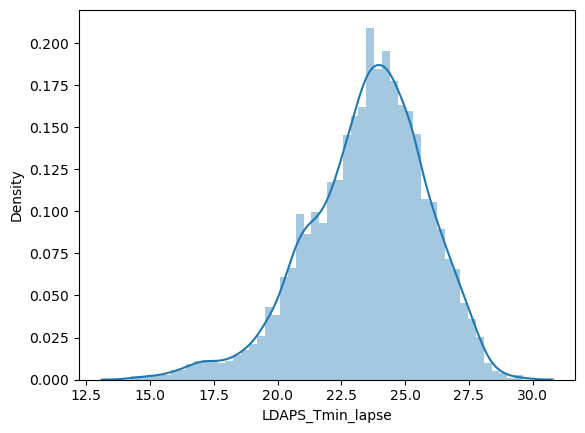

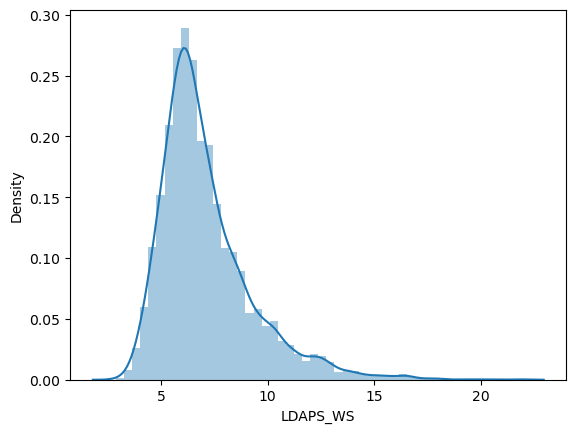

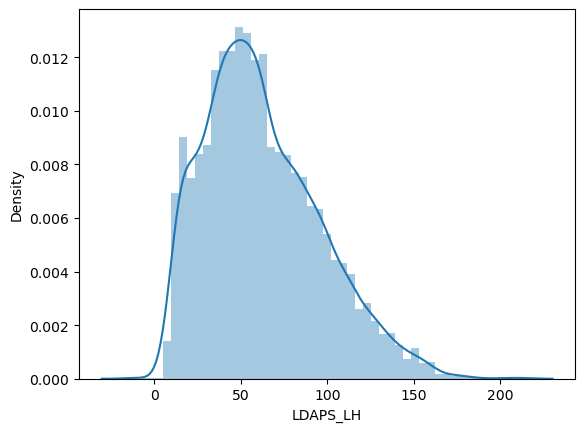

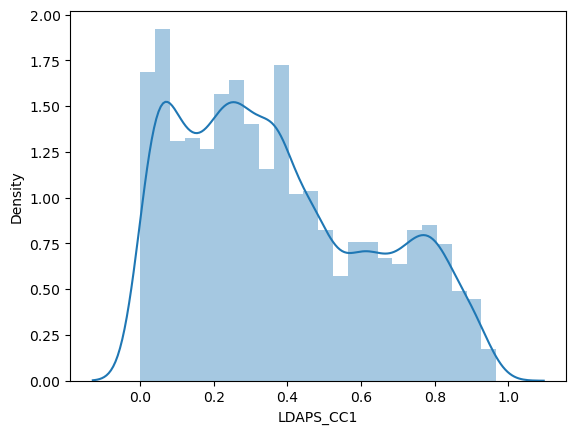

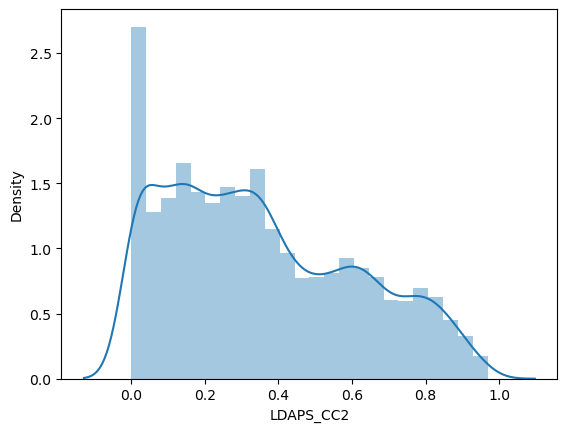

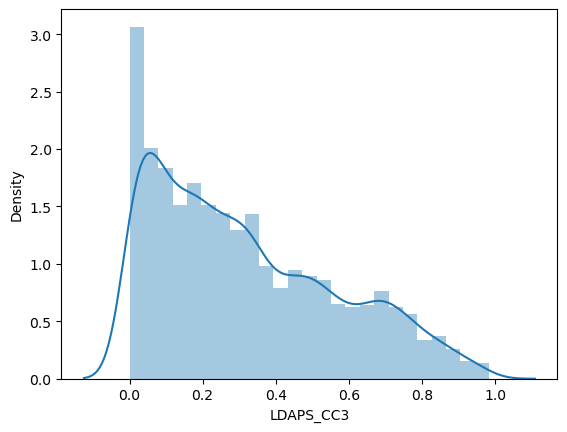

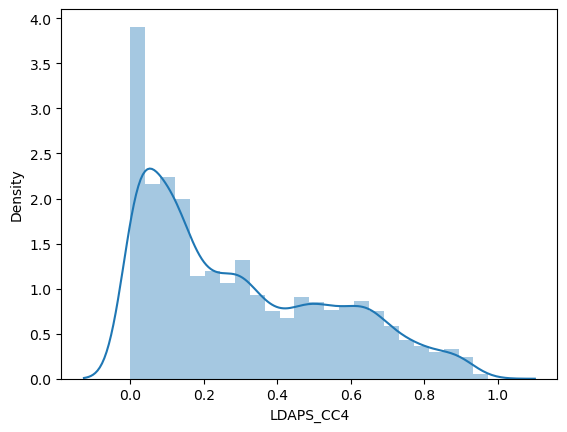

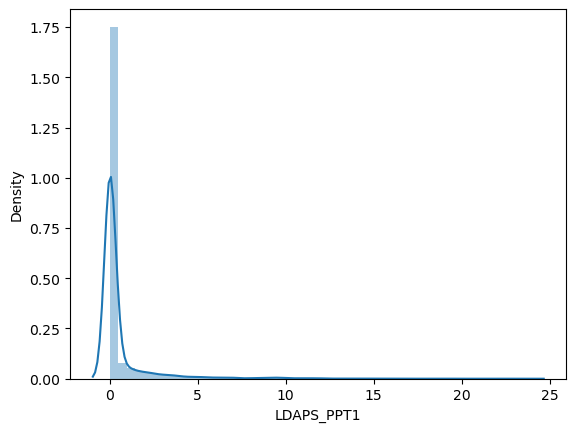

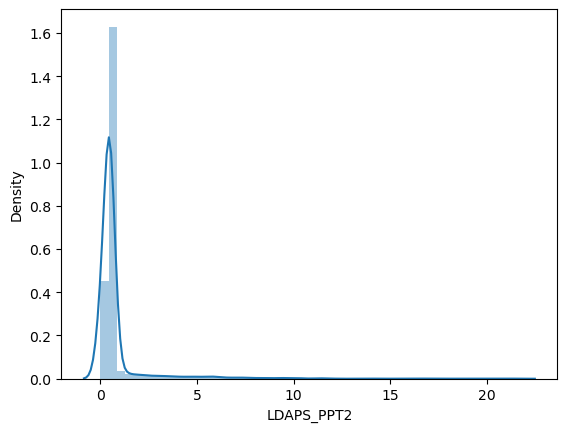

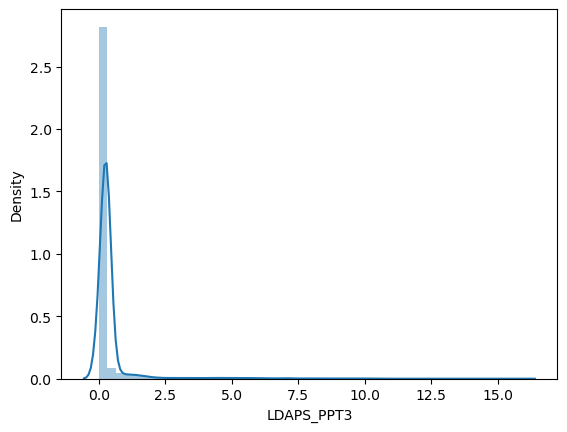

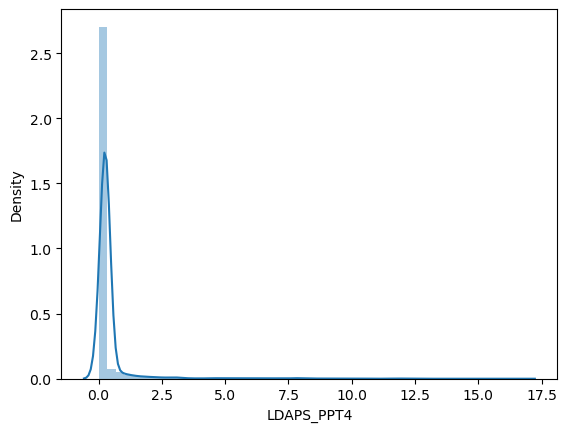

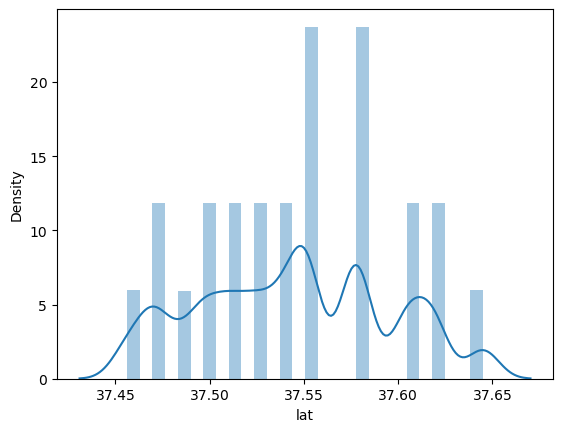

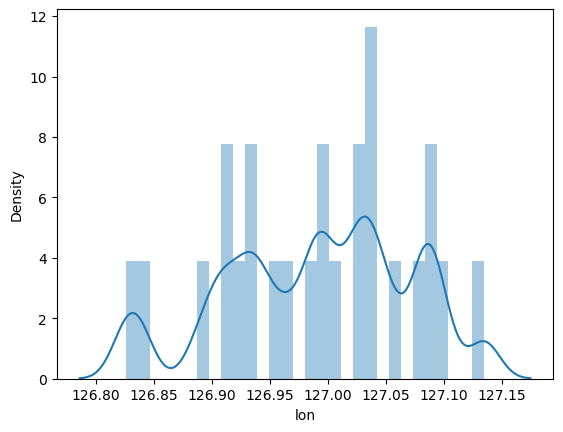

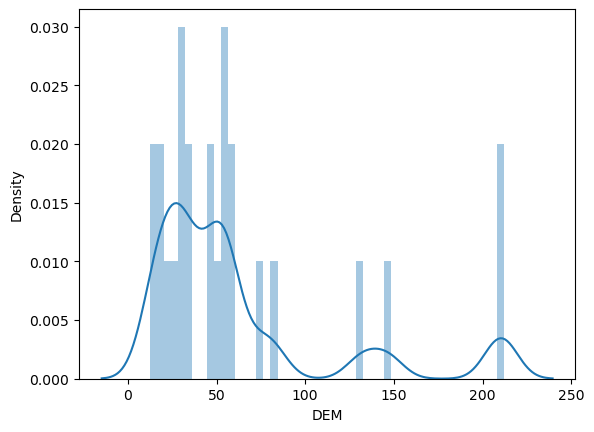

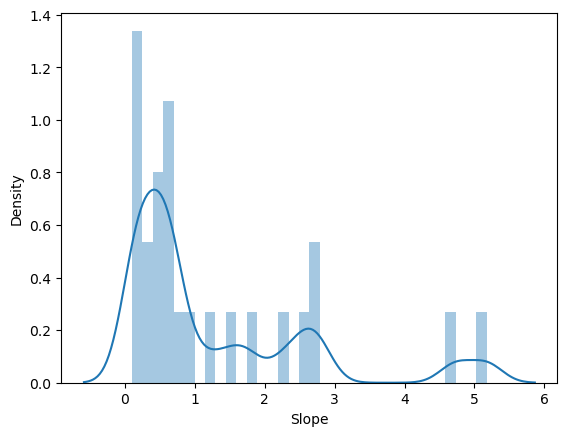

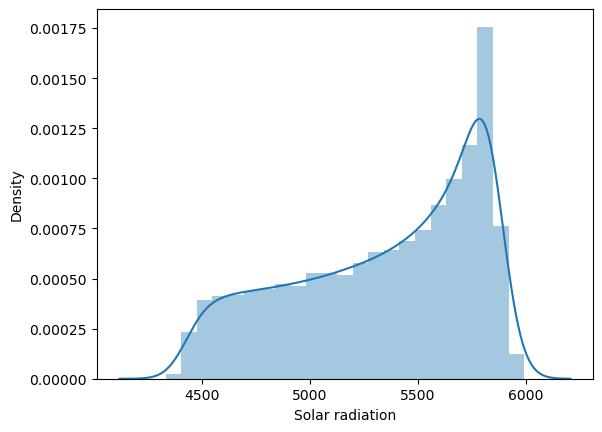

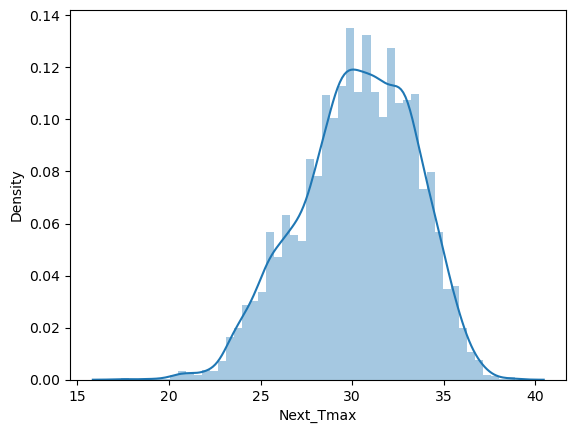

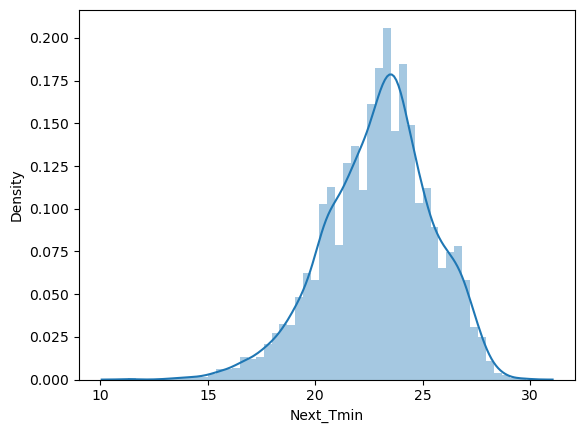

In [99]:
# Checking the Distribution of data after filling missing and zero values 

for i in data.columns:
    plt.figure()
    sns.distplot(data[i])

- Station: Has a bell shape and normally distributed 
- Date: Normally distributed 
- Present_Tmax: Normally distributed 
- Present_Tmax: Normally distributed 
- LDAPS_RHmin: Data has a bell shape and normally distributed 
- LDAPS_RHmax: Data has a bell shape but skewed to the left. 
- LDAPS_Tmax: Data has a bell shape with  skewness and almost normally distributed 
- LDAPS_Tmin: Data has a bell shape and normally distributed 
- LDAPS_WS: Data has a bell shape and almost normally distributed with skewness
- LDAPS_LH: Data fellow a bell shape and almost normally distributed with skewness 
- LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4: Data in all four columns fellows a bell shape and almost normally distributed with skewness 
- LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4: Data in four columns fellows bell shape but are not normally distributed with abnormalies 
- lat: Data fellows bell shape but almost normally distributed 
- Log: Data fellows bell shape, almost normaly distributed 
- Dem: fellows bell shape and almost nrmally distributed 
- Slope: Fellows bell shape and not normally distributed 
- Solar radiation: fellows bell shape is almost normally distributed and haing a negative skewed 
- Next_Tmin, Next_Tmax: The targets varaible fellows bell shapes are normally distributed 

# Analysing features against features and Target. 


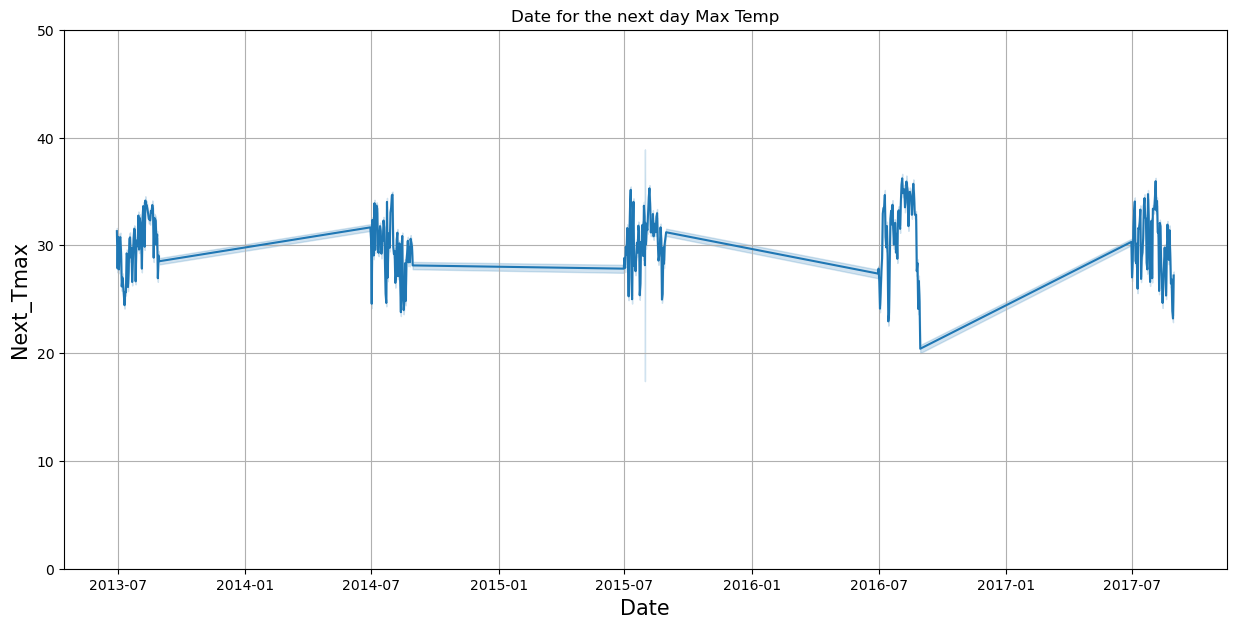

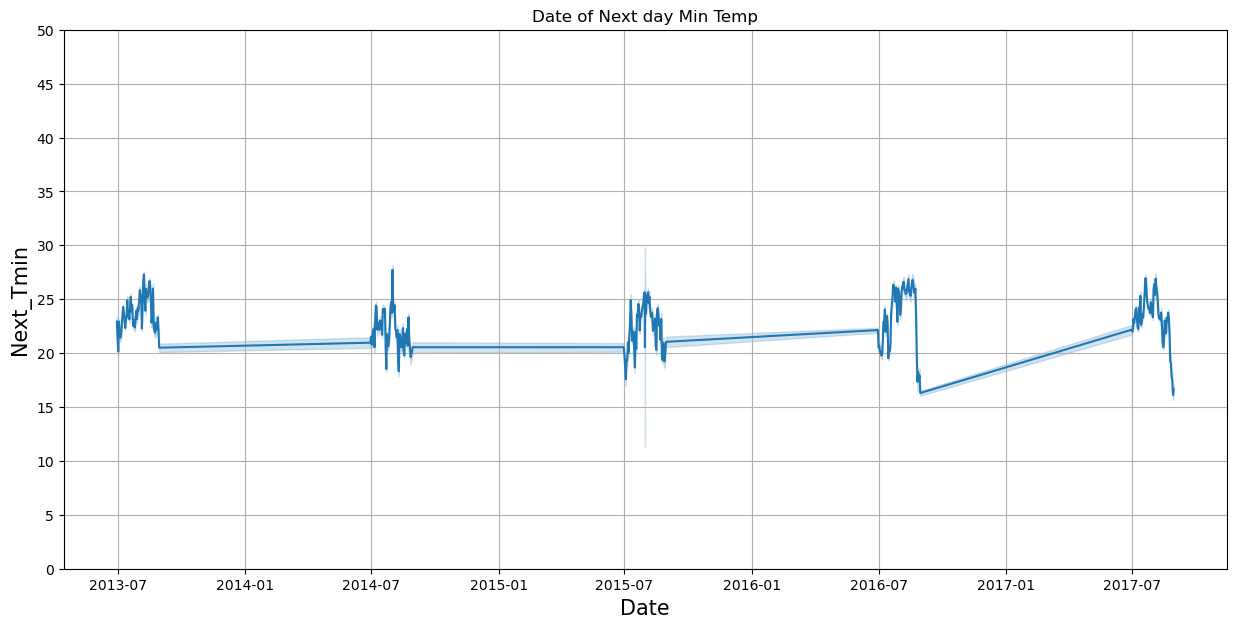

In [100]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Date', y='Next_Tmax', data= data )
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('Date for the next day Max Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lineplot(x='Date', y='Next_Tmin', data= data )
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('Date of Next day Min Temp')
plt.show()

The first graph shows result date for the next day maximum temperature which occurred between 2016 and 2017 at temperation of 36 degree. While the second graph showing minimum teperature which ocuured betwwen 2016 and 2017 at temperature of 16 degree. 

Text(0.5, 1.0, 'Station per Next Min Temp')

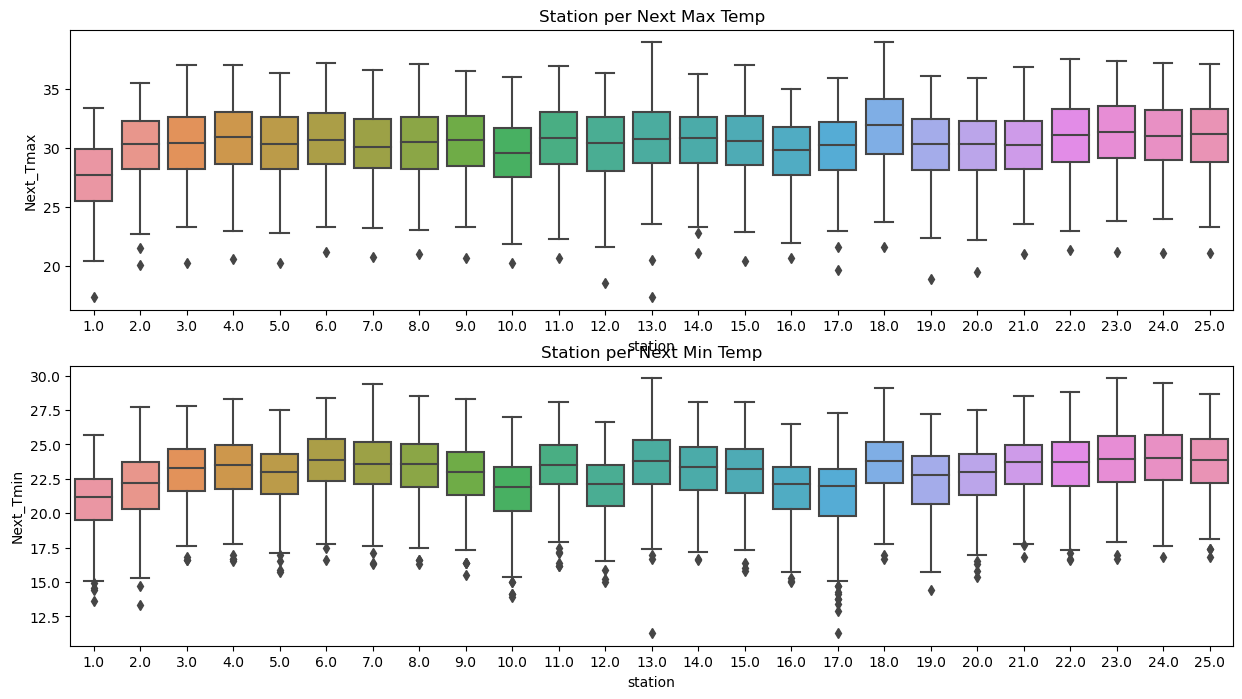

In [101]:
#Ploting with box plot to check station
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=data)
plt.title('Station per Next Max Temp')


plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=data)
plt.title('Station per Next Min Temp')


The first graph show that the Next day Maximum Temparature is at station 18. The second graph shows the Next day Minimum Temparature  at station 17. 

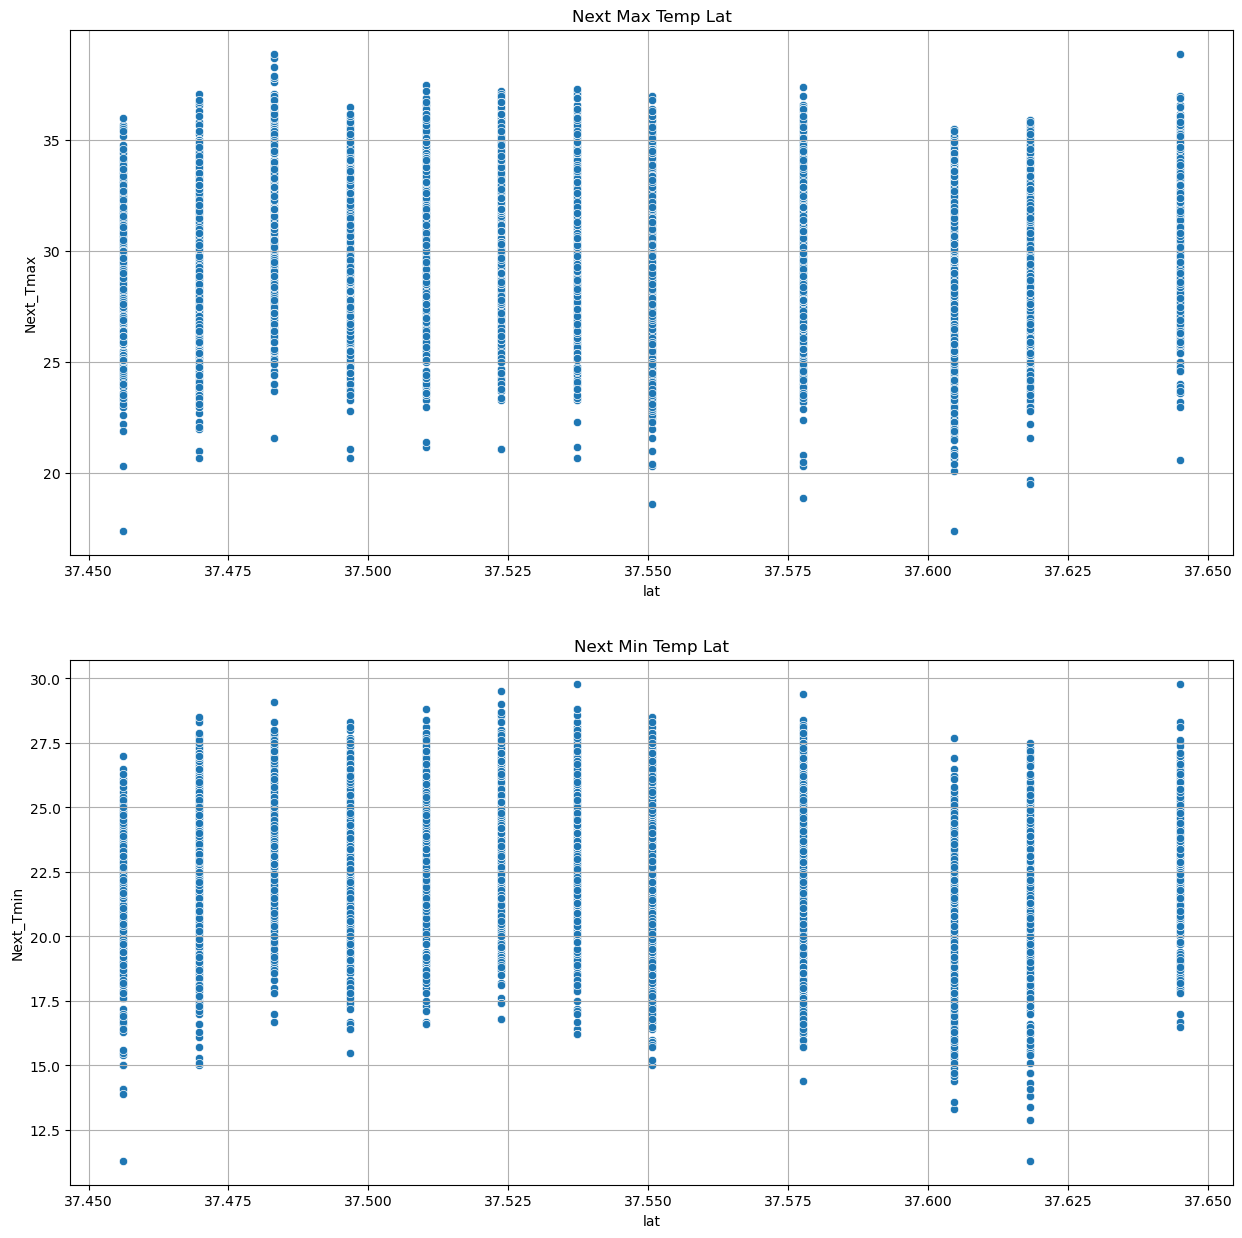

In [102]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.scatterplot(x='lat',y='Next_Tmax',data=data)
plt.title('Next Max Temp Lat')
plt.grid(True)


plt.subplot(2,1,2)
sns.scatterplot(x='lat',y='Next_Tmin',data=data)
plt.title('Next Min Temp Lat')
plt.grid(True)

According to the graph we can see when the temperature increase beyond 35 degree latitude also latitude also increases. 
The reverse the case. when the temperature decrease to 30 degree latitude also decreased 

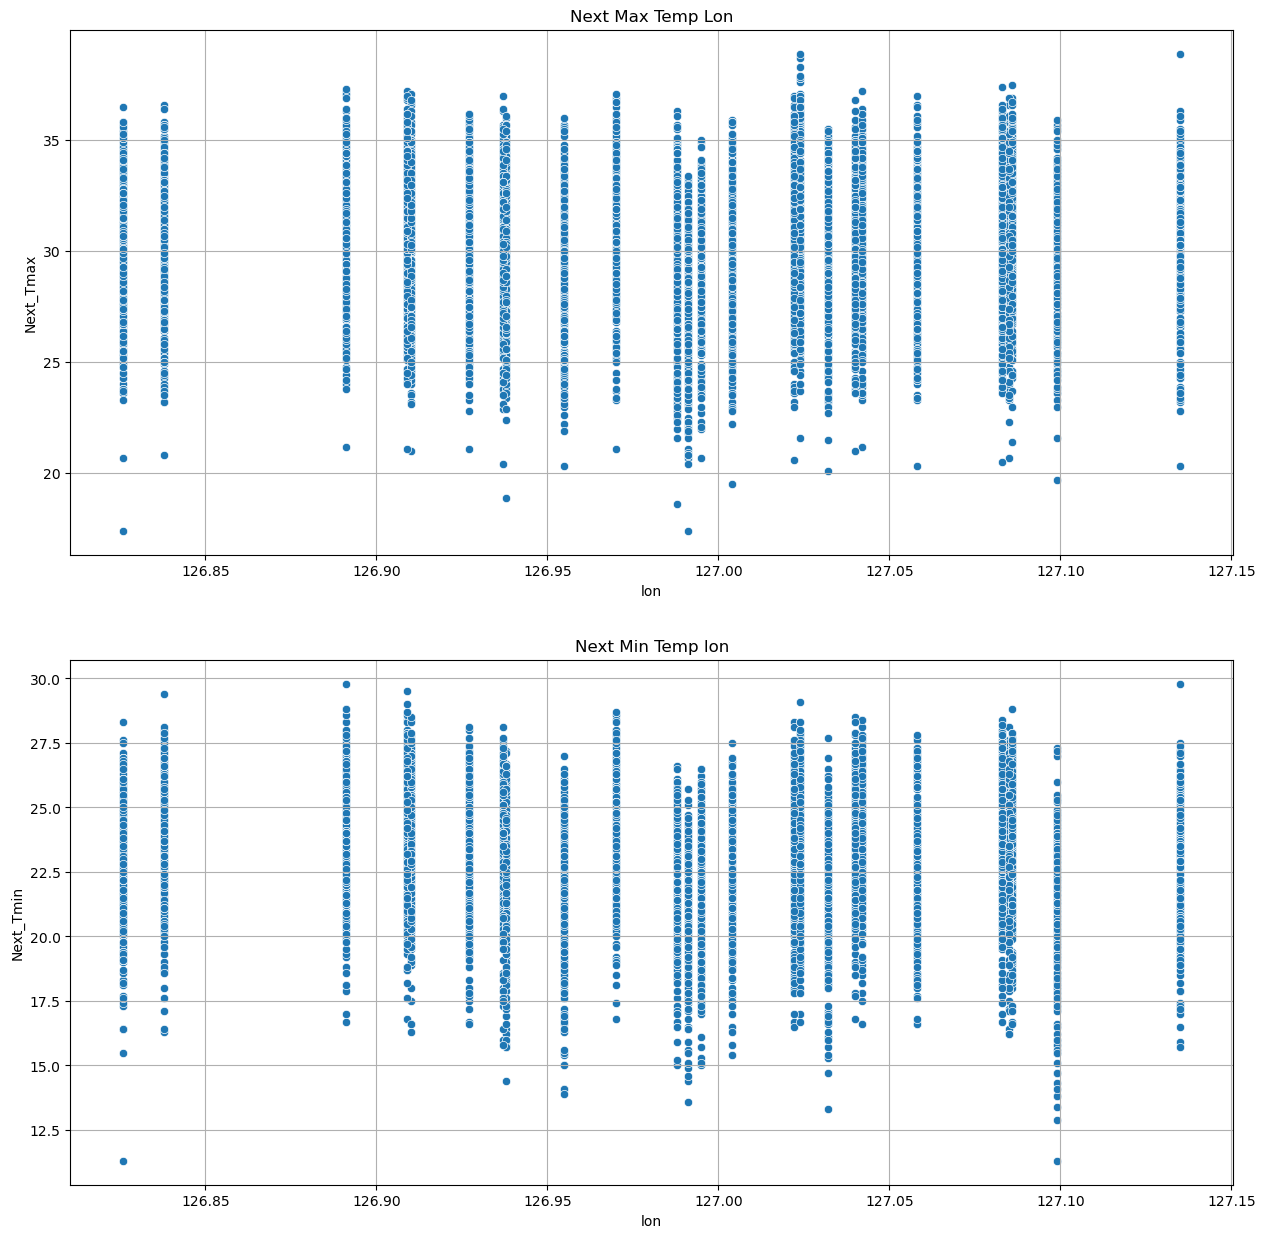

In [103]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.scatterplot(x='lon',y='Next_Tmax',data=data)
plt.title('Next Max Temp Lon')
plt.grid(True)


plt.subplot(2,1,2)
sns.scatterplot(x='lon',y='Next_Tmin',data=data)
plt.title('Next Min Temp lon')
plt.grid(True)

The graphs above show no direct relationship between Next day Temperature. It only shows the position of highest and the lowest log the Temperature for the next day

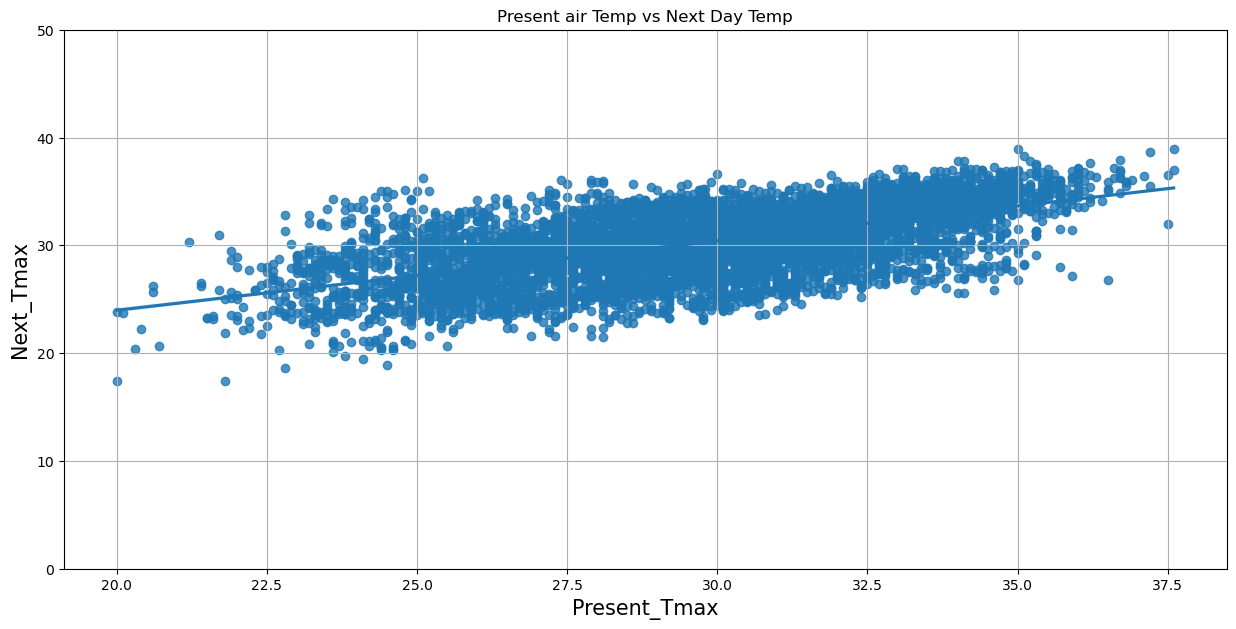

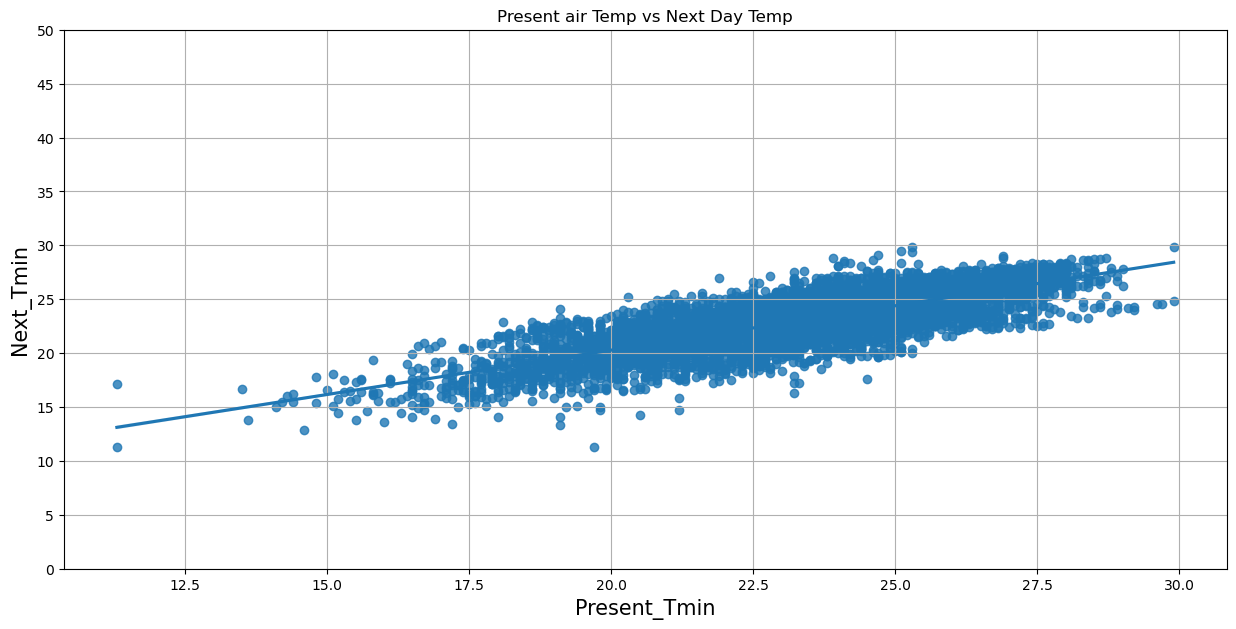

In [104]:
plt.figure(figsize=(15,7))
sns.regplot(x='Present_Tmax', y='Next_Tmax', data= data )
plt.xlabel('Present_Tmax', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('Present air Temp vs Next Day Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.regplot(x='Present_Tmin', y='Next_Tmin', data= data )
plt.xlabel('Present_Tmin', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('Present air Temp vs Next Day Temp')
plt.show()

The above graphs shows that there is a strong linear relationship between Present_Tmin/Tamx and Next_Tmax/Min at the best fit line When the Present of air temperation increases it will  increase the temperature for the next day. For The Present of minimun temperature when is reduce the next day temperature reduces. 

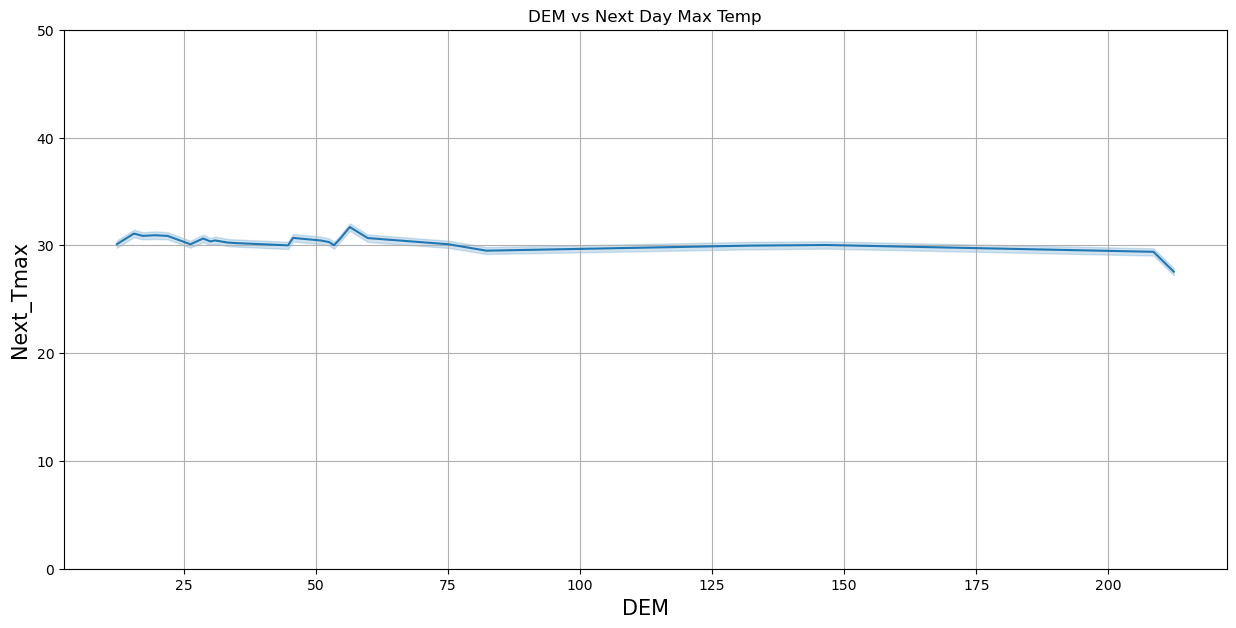

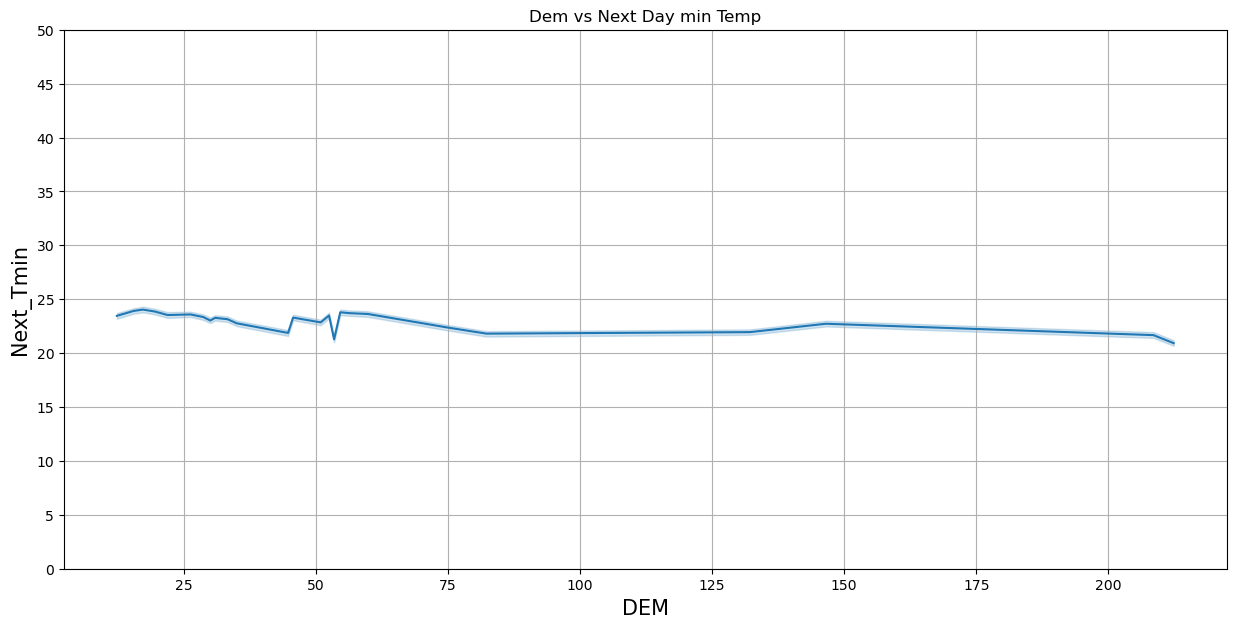

In [105]:
plt.figure(figsize=(15,7))
sns.lineplot(x='DEM', y='Next_Tmax', data= data )
plt.xlabel('DEM', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('DEM vs Next Day Max Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lineplot(x='DEM', y='Next_Tmin', data= data )
plt.xlabel('DEM', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('Dem vs Next Day min Temp')
plt.show()

The above line graph shows there is a decrease in next day temperature both in T_Max and T_Min when there is an increase in elevation

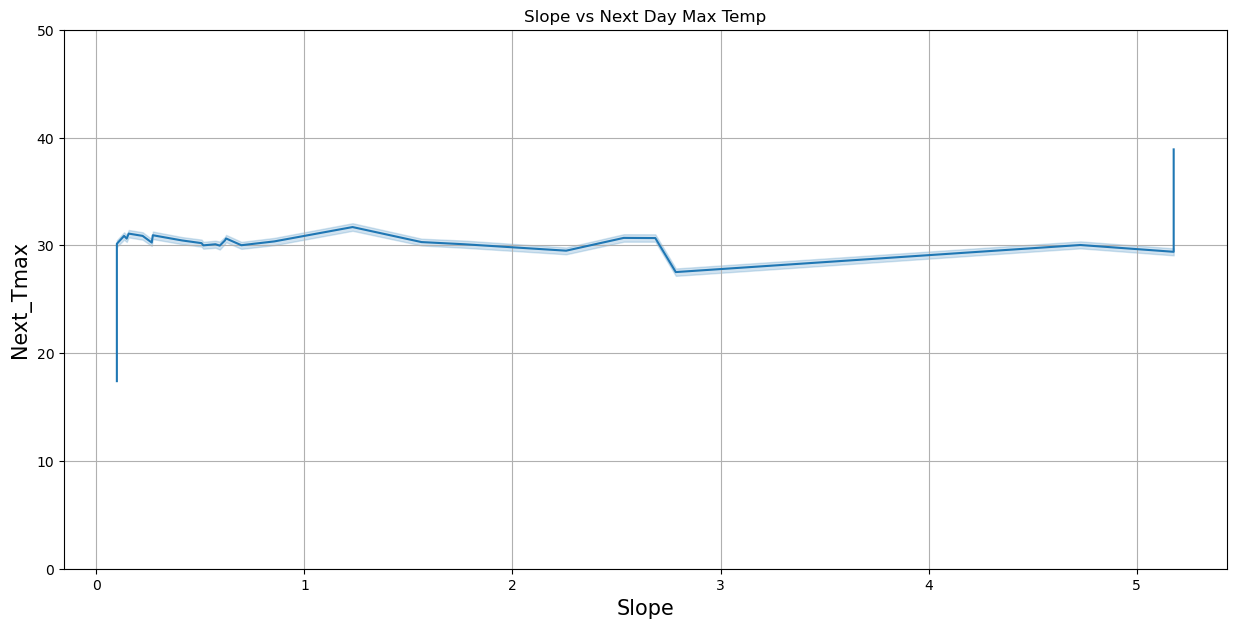

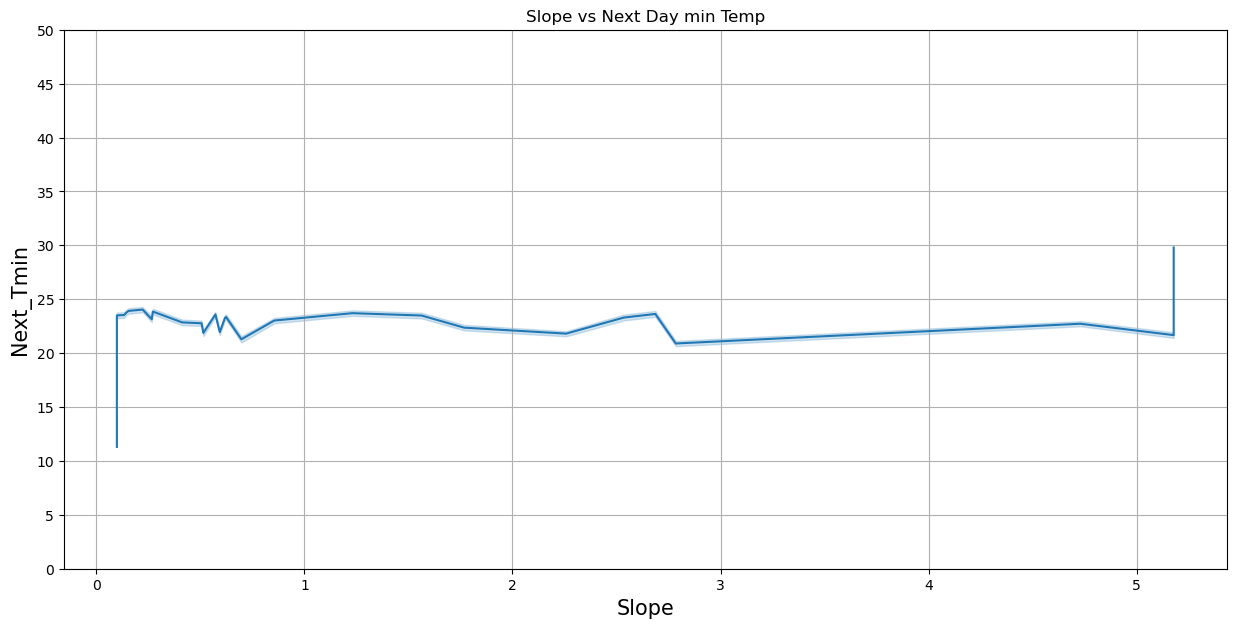

In [106]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Slope', y='Next_Tmax', data= data )
plt.xlabel('Slope', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('Slope vs Next Day Max Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lineplot(x='Slope', y='Next_Tmin', data= data )
plt.xlabel('Slope', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('Slope vs Next Day min Temp')
plt.show()

The above line graph shows  temperation wasn't stable, it decrease and increase from 0-5 degrees until after the temperation passes 5 degrees there was a constant increase 

<Figure size 1500x700 with 0 Axes>

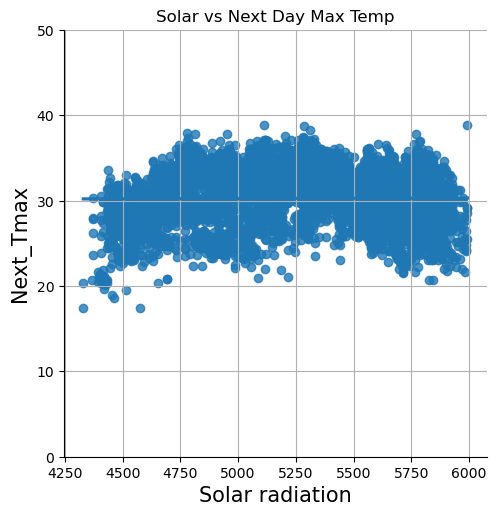

<Figure size 1500x700 with 0 Axes>

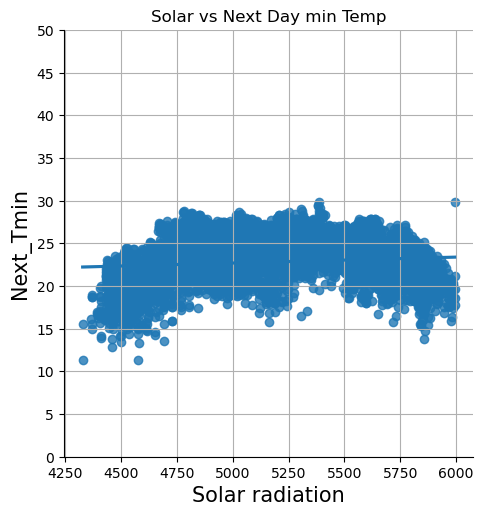

In [107]:
plt.figure(figsize=(15,7))
sns.lmplot(x='Solar radiation', y='Next_Tmax', data= data )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('Solar vs Next Day Max Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lmplot(x='Solar radiation', y='Next_Tmin', data= data )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('Solar vs Next Day min Temp')
plt.show()

You can see there is a linear relationship between solar radiation and temperation. When there is an increase in solar radiation there is also going to be any increase in Temperature. 
The reverse the case in Next day min temperature. We can the decrease in solar radiation also there is a decrease in temperation. 

<Figure size 1500x700 with 0 Axes>

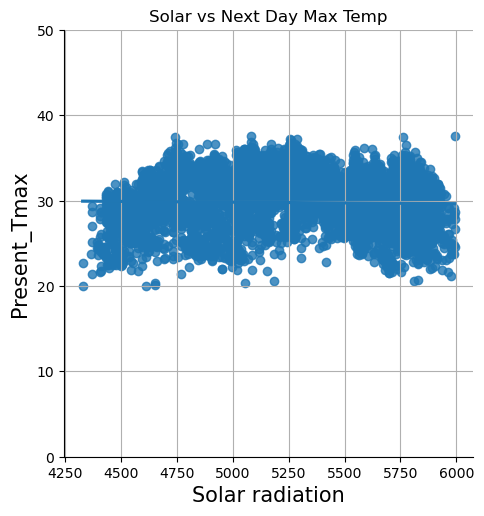

<Figure size 1500x700 with 0 Axes>

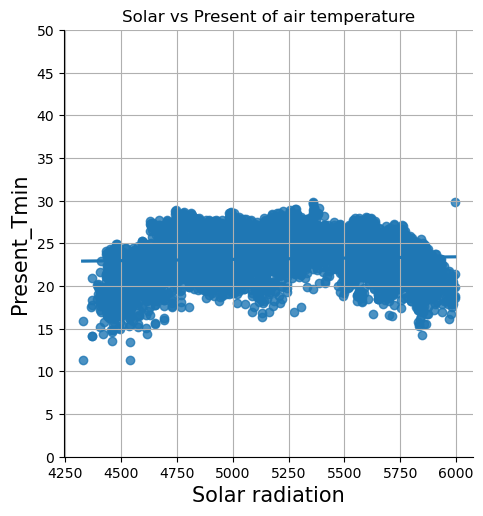

In [108]:
plt.figure(figsize=(15,7))
sns.lmplot(x='Solar radiation', y='Present_Tmax', data= data )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Present_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('Solar vs Next Day Max Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lmplot(x='Solar radiation', y='Present_Tmin', data= data )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Present_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('Solar vs Present of air temperature')
plt.show()

Here we can see on the above lm graph that there is strong relationship between Solar Radiation and Present of Air Temperature

<Figure size 1500x700 with 0 Axes>

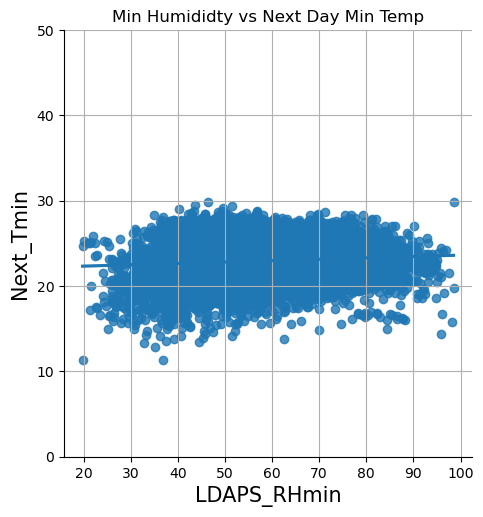

<Figure size 1500x700 with 0 Axes>

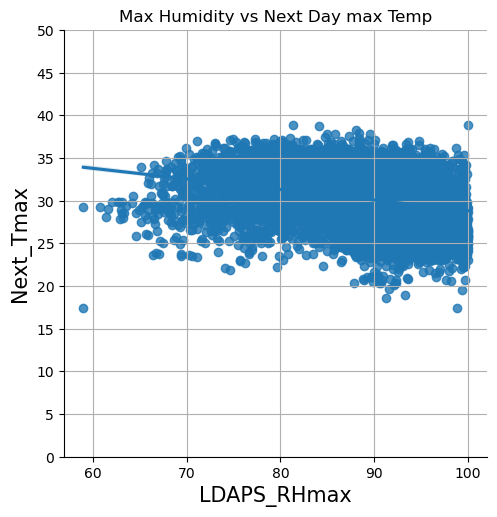

In [109]:
plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_RHmin', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_RHmin', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('Min Humididty vs Next Day Min Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_RHmax', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_RHmax', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('Max Humidity vs Next Day max Temp')
plt.show()

According to the above graphs when there is an increase in Temperature there relative humidity decreses. When there is a decrease in temperature the humidity increases. 

<Figure size 1500x700 with 0 Axes>

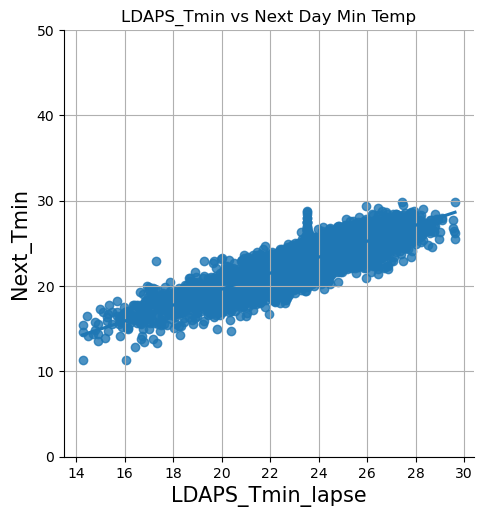

<Figure size 1500x700 with 0 Axes>

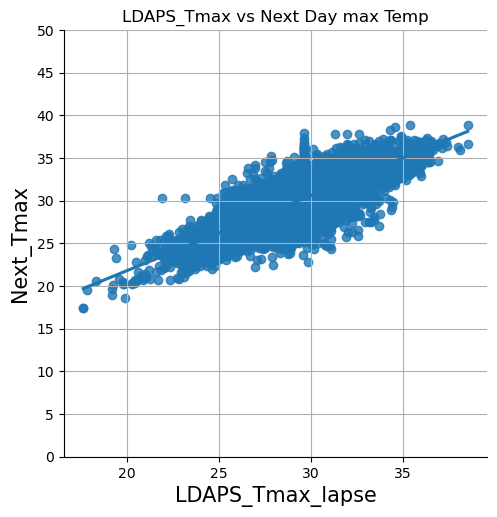

In [110]:
plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_Tmin_lapse', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_Tmin_lapse', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('LDAPS_Tmin vs Next Day Min Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_Tmax_lapse', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_Tmax_lapse', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_Tmax vs Next Day max Temp')
plt.show()

The above graphs show is a strong positive linear relationship 

<Figure size 1500x700 with 0 Axes>

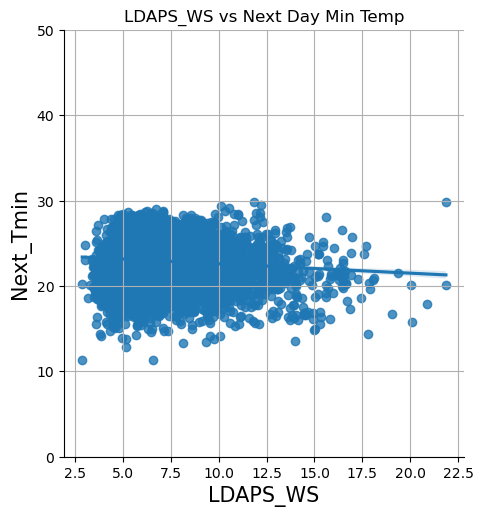

<Figure size 1500x700 with 0 Axes>

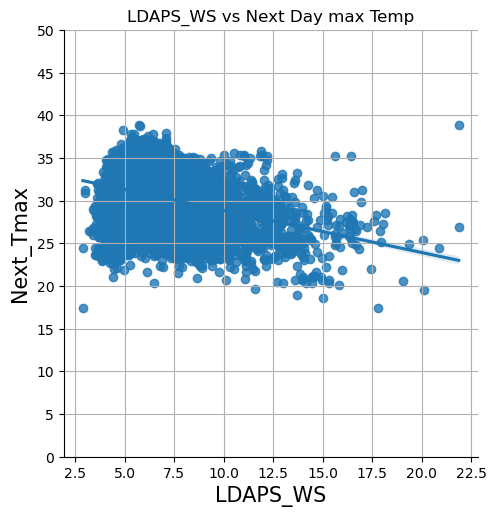

In [111]:
plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_WS', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_WS', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('LDAPS_WS vs Next Day Min Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_WS', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_WS', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_WS vs Next Day max Temp')
plt.show()

- The first graph shows that increase in temperature reduces wind speed 
- Second graph shows clearly that reduction in temperature increase wind speed. 


<Figure size 1500x700 with 0 Axes>

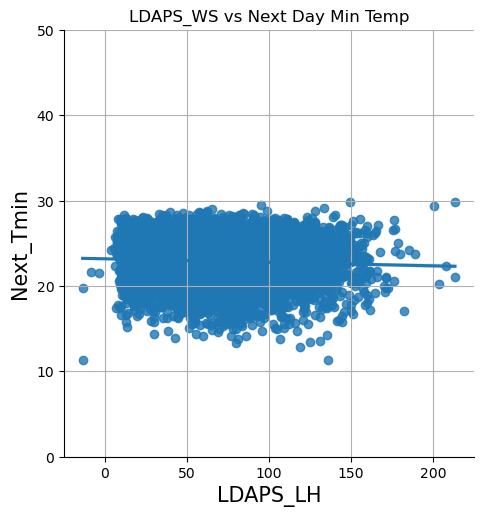

<Figure size 1500x700 with 0 Axes>

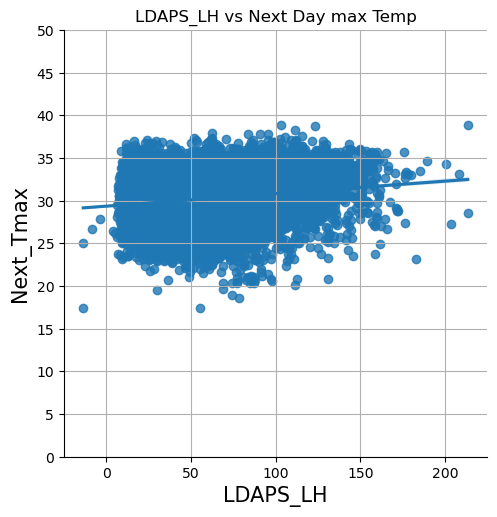

In [112]:
plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_LH', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_LH', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('LDAPS_WS vs Next Day Min Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_LH', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_LH', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_LH vs Next Day max Temp')
plt.show()


According to the graph result, the first graph shows decrease in temperature also also cause decrease in latent heat 
second graph shows increase in temperature cause increase in latent heat. 

<Figure size 1500x700 with 0 Axes>

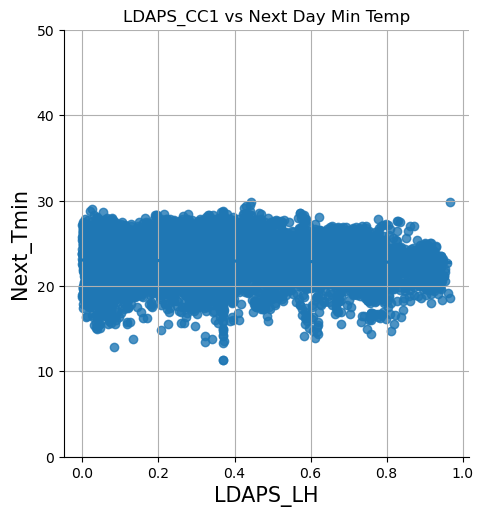

<Figure size 1500x700 with 0 Axes>

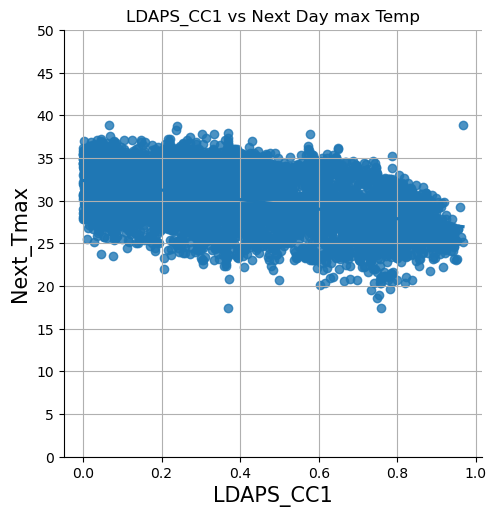

<Figure size 1500x700 with 0 Axes>

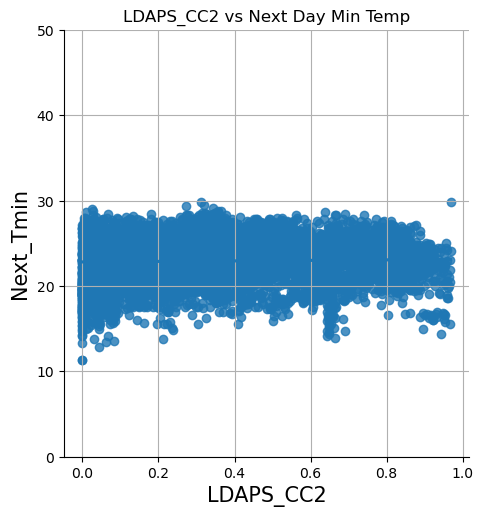

<Figure size 1500x700 with 0 Axes>

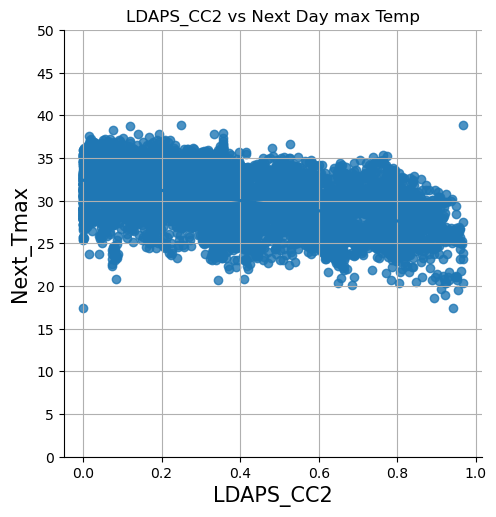

In [113]:
plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_CC1', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_LH', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('LDAPS_CC1 vs Next Day Min Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_CC1', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_CC1', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_CC1 vs Next Day max Temp')
plt.show()

plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_CC2', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('LDAPS_CC2 vs Next Day Min Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_CC2', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_CC2 vs Next Day max Temp')
plt.show()


According to the graphs result between split average cloud cover and Next day temperature.
The plot is not showing very good relationship.
In 4 graphs we can see slightly negative relation

<Figure size 1500x700 with 0 Axes>

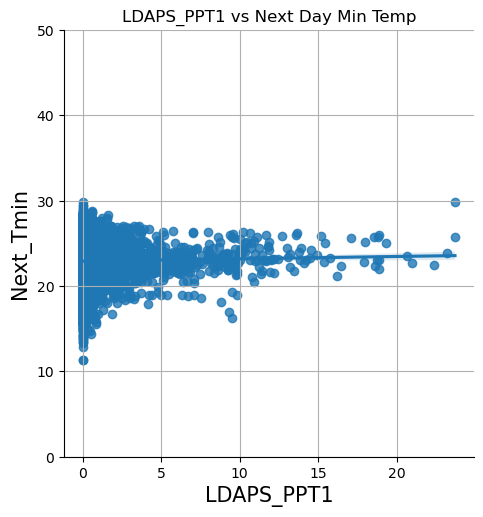

<Figure size 1500x700 with 0 Axes>

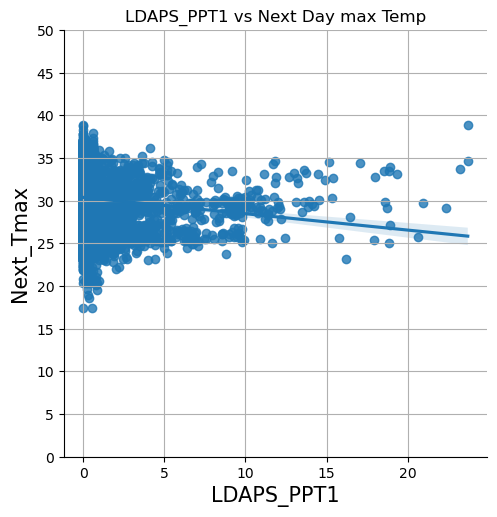

<Figure size 1500x700 with 0 Axes>

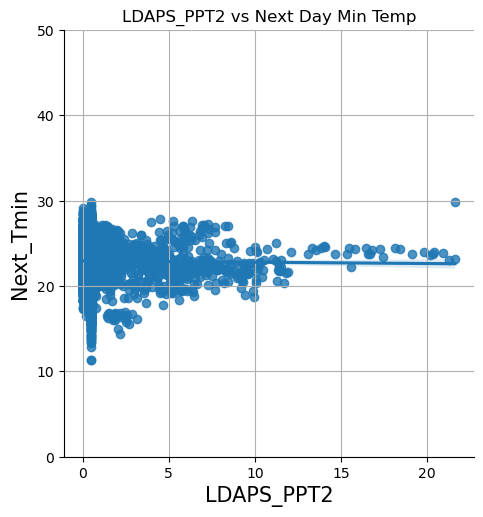

<Figure size 1500x700 with 0 Axes>

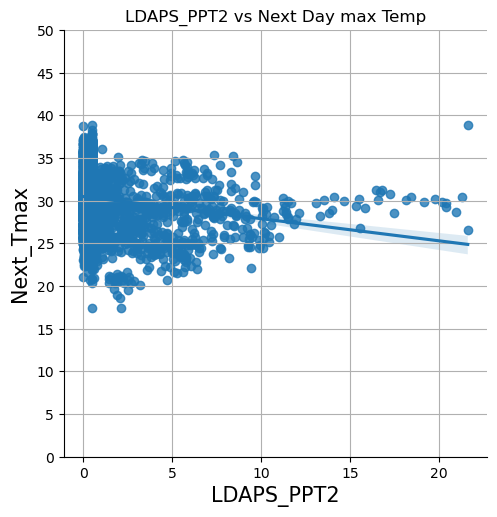

<Figure size 1500x700 with 0 Axes>

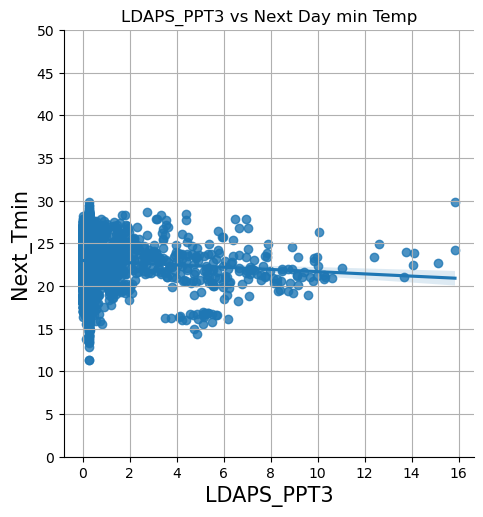

<Figure size 1500x700 with 0 Axes>

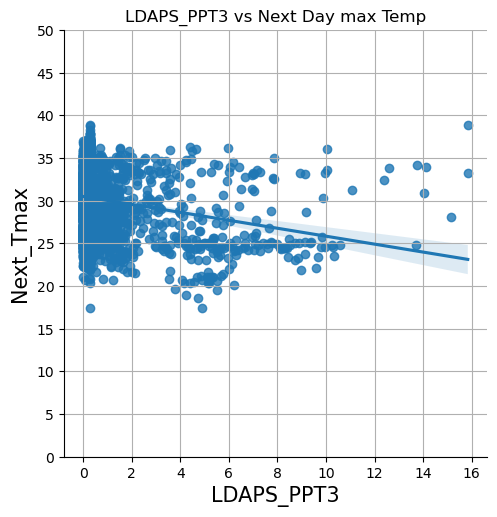

<Figure size 1500x700 with 0 Axes>

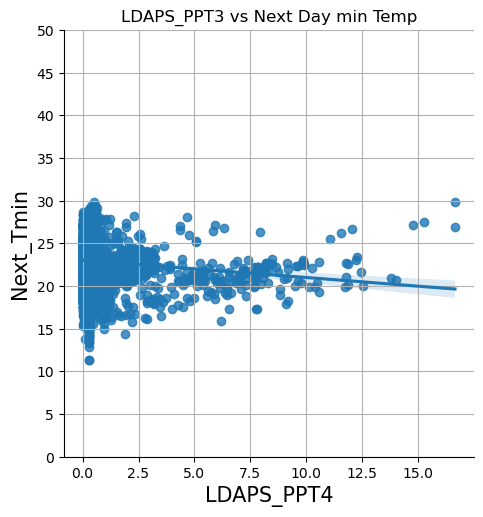

<Figure size 1500x700 with 0 Axes>

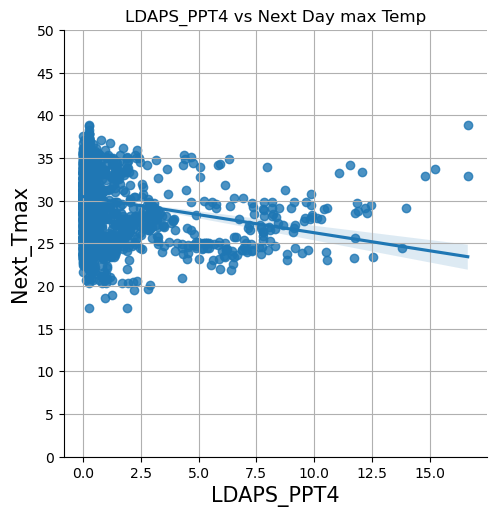

In [114]:
plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_PPT1', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT1', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('LDAPS_PPT1 vs Next Day Min Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_PPT1', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT1', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_PPT1 vs Next Day max Temp')
plt.show()

plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_PPT2', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT2', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,10))
plt.title('LDAPS_PPT2 vs Next Day Min Temp')
plt.show()


plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_PPT2', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_PPT2 vs Next Day max Temp')
plt.show()

plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_PPT3', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT3', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_PPT3 vs Next Day min Temp')
plt.show()

plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_PPT3', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT3', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_PPT3 vs Next Day max Temp')
plt.show()

plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_PPT4', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT4', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_PPT3 vs Next Day min Temp')
plt.show()

plt.figure(figsize=(15,7))
sns.lmplot(x='LDAPS_PPT4', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT4', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.yticks(range(0,55,5))
plt.title('LDAPS_PPT4 vs Next Day max Temp')
plt.show()


THe graphs shows realtioship between split average precipitation and Temprature , according to the plots result we see a negative realtionship between both the quantities.



Now that we have analysed each feactures against our targets variables. I will be dropping Date, Station, lon and lat columns. 

In [115]:
data.drop(['station','Date','lon','lat'],axis=1,inplace=True)
print(data.shape)

(7752, 21)


In [116]:
data.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0         23.006936  6.818887   69.451805   0.233947   0.203896  ...   
1         24.035009  5.691890   51.937448   0.225508   0.251771  ...   
2         24.565633  6.138224   20.573050   0.209344   0.257469  ...   
3         23.326177  5.650050   65.727144   0.216372   0.226002  ...   
4         23.486480  5.735004  107.965535   0.151407   0.249995  ...   

   LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0   0.130928         0.0    0.485003      0.2782    0.269407  212.3350   
1   0.127727         0.0    0.485003      0.2782    0.269407   44.7624   
2   0.142125         0.0    0.485003      0.2782    0.269407   33.3068   
3   0.134249         0.0    0.485003      0.2782    0.269407   45.7160   
4   0.170021         0.0    0.485003      0.2782    0.269407   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  
0  2.7850      5992.895996       29.1       21.2  
1  0.5141      5869.312500       30.5       22.5  
2  0.2661      5863.555664       31.1       23.9  
3  2.5348      5856.964844       31.7       24.3  
4  0.5055      5859.552246       31.2       22.5  

[5 rows x 21 columns]

Station,lon,lat and date columns have been dropped. 

# Checking outliers 

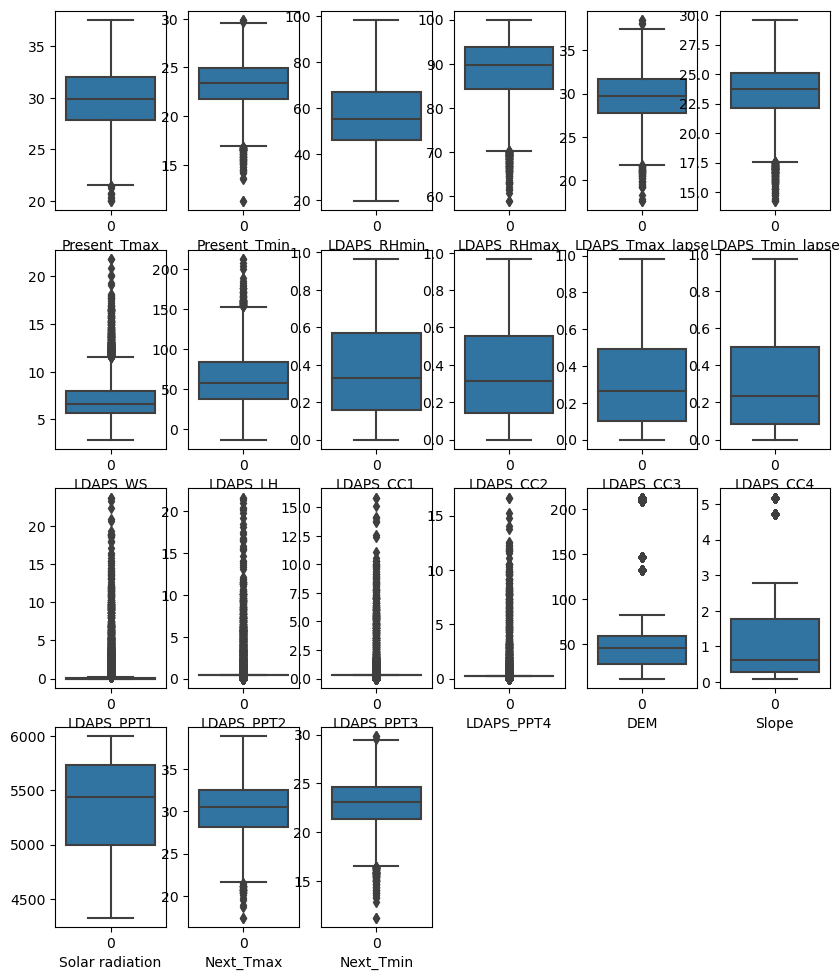

In [117]:
plt.figure(figsize=(10,15))
graphnumb = 1
for column in data:
    if graphnumb <= 21:
        ax = plt.subplot(5,6,graphnumb)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize= 10)
    graphnumb +=1
plt.show()
    

In [118]:
data.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Present_Tmax, Present_Tmin,LDAPS_RHmax,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmin,Next_Tmin. These are columns with ouliers presence. 

In [119]:
# checking skewness values (-0.5-+0.5)
data.skew()

Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.460637
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          6.026454
LDAPS_PPT3          6.655102
LDAPS_PPT4          7.038105
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

LDAPS_RHmax, LDAPS_LH, LDAPS_Tmin_lapse, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope.These are columns with skewness presence. 

In [120]:
data.shape

(7752, 21)

# Removing Outliers Using Zscore 

In [122]:
#Removing Outliers 
from scipy.stats import zscore
z_score=np.abs(zscore(data))
threshold=3
print('position where there is outliers:', np.where(z_score > 3))
new_data=data[(z_score<3).all(axis=1)]
print('Old Data Frame:', data.shape[0])
print('New Data Frame:', new_data.shape[0])
print('percentage of loss of data by zscore is :',(data.shape[0]-new_data.shape[0])/data.shape[0])

position where there is outliers: (array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 6, 13, 13, ..., 13, 14, 15], dtype=int64))
Old Data Frame: 7752
New Data Frame: 6906
percentage of loss of data by zscore is : 0.10913312693498452


I am satisfied with the data lost because is not more than 10% of our original data. 

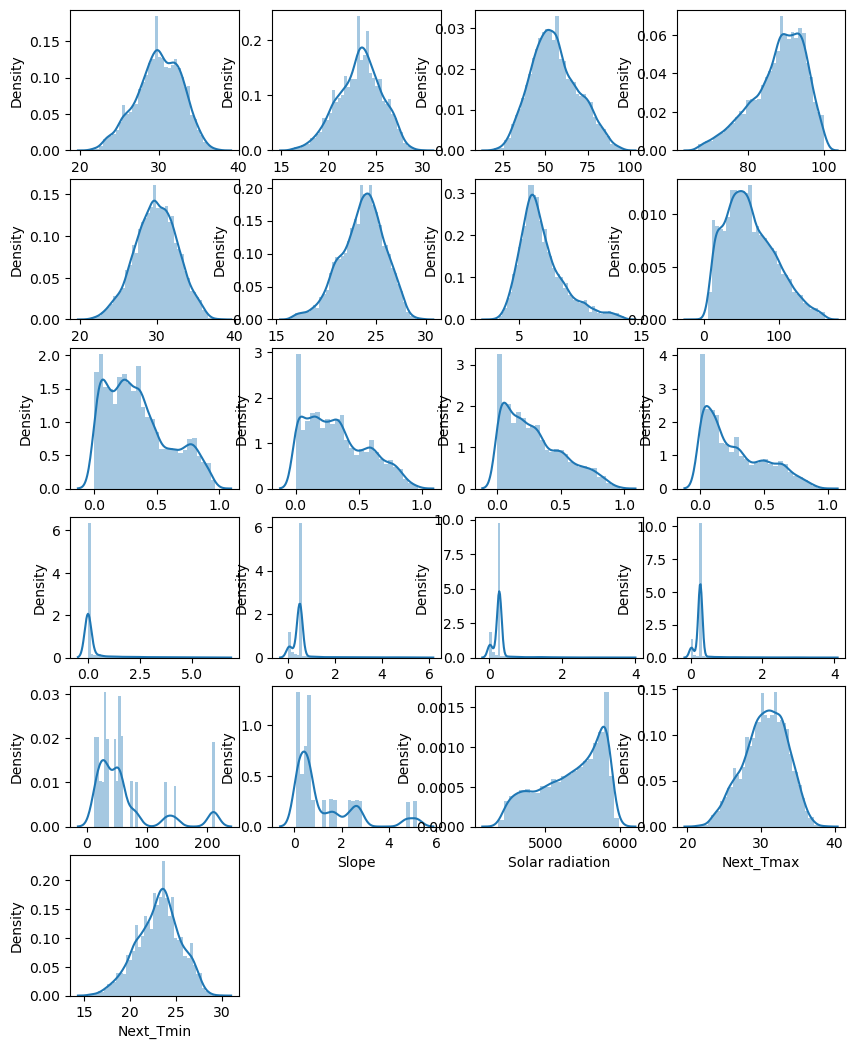

In [125]:
# Checking the data distribution after removing outliers 
plt.figure(figsize=(10,15))
graphnumb = 1
for column in new_data:
    if graphnumb <= 21:
        ax = plt.subplot(7,4,graphnumb)
        sns.distplot(new_data[column])
        plt.xlabel(column,fontsize= 10)
    graphnumb +=1
plt.show()


In [133]:
new_data.skew()

Present_Tmax       -0.273815
Present_Tmin       -0.228397
LDAPS_RHmin         0.303196
LDAPS_RHmax        -0.690139
LDAPS_Tmax_lapse   -0.108587
LDAPS_Tmin_lapse   -0.382914
LDAPS_WS            1.086592
LDAPS_LH            0.569338
LDAPS_CC1           0.590971
LDAPS_CC2           0.498779
LDAPS_CC3           0.698125
LDAPS_CC4           0.709805
LDAPS_PPT1          3.704044
LDAPS_PPT2          4.843927
LDAPS_PPT3          5.515304
LDAPS_PPT4          6.099594
DEM                 1.764272
Slope               1.593792
Solar radiation    -0.507036
Next_Tmax          -0.272312
Next_Tmin          -0.237099
dtype: float64

After removing outliers the data distribution looks ok compare to the previous distribution but we can still observed skewness in some columns 

# Removing skewness using Cube Root Method 

In [142]:
new_data['LDAPS_RHmax'] = np.cbrt(new_data['LDAPS_RHmax'])
new_data['LDAPS_LH'] = np.cbrt(new_data['LDAPS_LH'])
new_data['LDAPS_CC1'] = np.cbrt(new_data['LDAPS_CC1'])
new_data['LDAPS_CC3'] = np.cbrt(new_data['LDAPS_CC3'])
new_data['LDAPS_CC4'] = np.cbrt(new_data['LDAPS_CC4'])
new_data['LDAPS_PPT1'] = np.cbrt(new_data['LDAPS_PPT1'])
new_data['LDAPS_PPT2'] = np.cbrt(new_data['LDAPS_PPT2'])
new_data['LDAPS_PPT3'] = np.cbrt(new_data['LDAPS_PPT3'])
new_data['LDAPS_PPT4'] = np.cbrt(new_data['LDAPS_PPT4'])
new_data['LDAPS_WS'] = np.cbrt(new_data['LDAPS_WS'])
new_data['DEM'] = np.cbrt(new_data['DEM'])

Skewness has been removed.

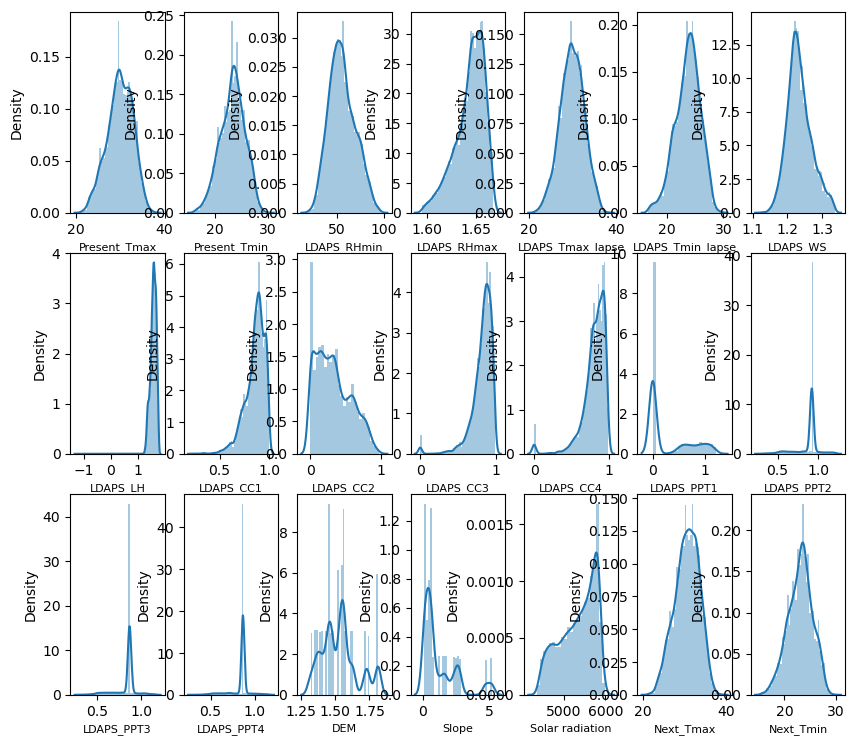

In [153]:
# Checking the distribution after removal of skewness 
plt.figure(figsize=(10,12))
graphnumb = 1
for column in new_data:
    if graphnumb <= 21:
        ax = plt.subplot(4,7,graphnumb)
        sns.distplot(new_data[column])
        plt.xlabel(column,fontsize= 8)
    graphnumb +=1
plt.show()

The distribution look almost normal after removing the  skewness. 

# Using heatmap to find multicollinearity problem 

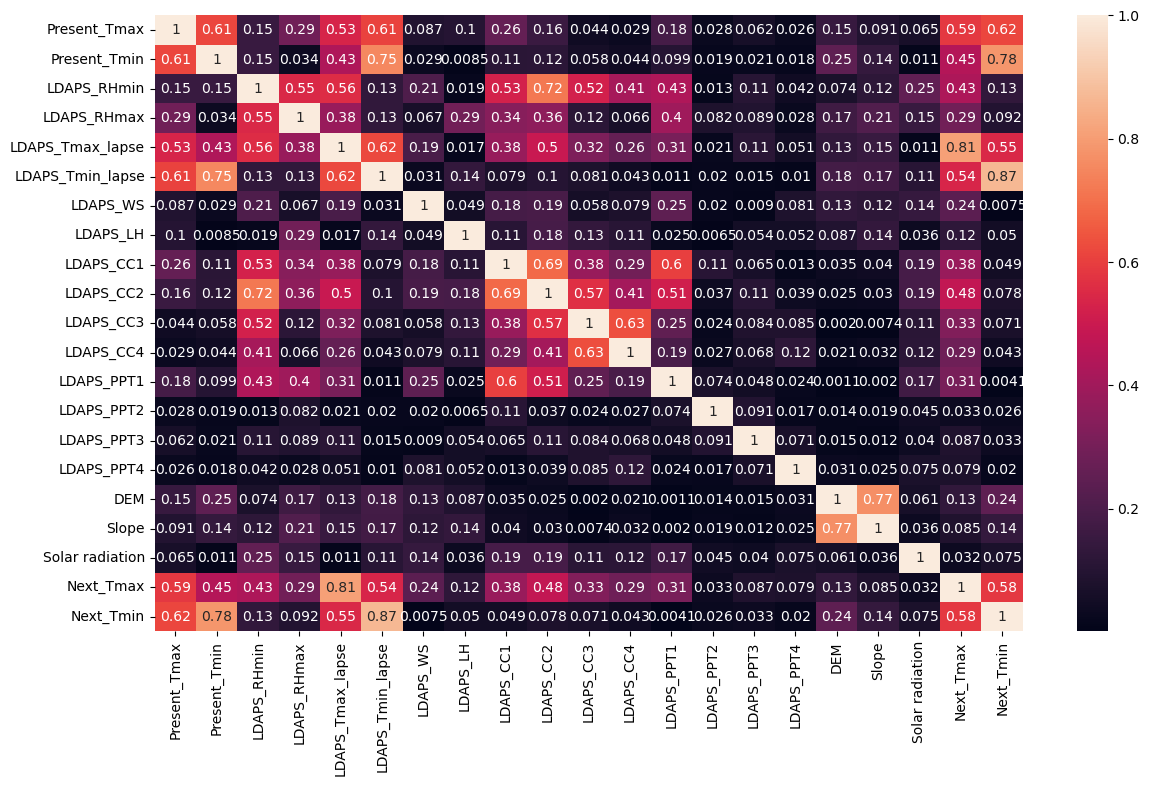

In [154]:
df_corr = new_data.corr().abs() # This code will get the coffiecient of one variable vs all other variable(Relationship)

plt.figure(figsize=(14,8))

sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

plt.show()

The above heatmap shows color scale of the  brightest box number means they have muliticollinearity problem. In this case I noticed DEM and Slope are 77%, LDAPS_CC1 and LDAPS_CC2 are 69%, LDAPS_CC3 AND LDAPS_CC4 are 63%,they are correlated. If  one increases the other directly increases. This is a direct relationship between them .This is what I am seeing on the heatmap. lets look at one more proof to show they are truly correlated with this below simply scatter plot

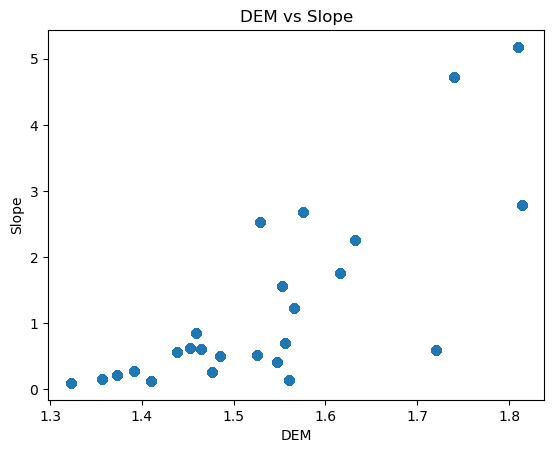

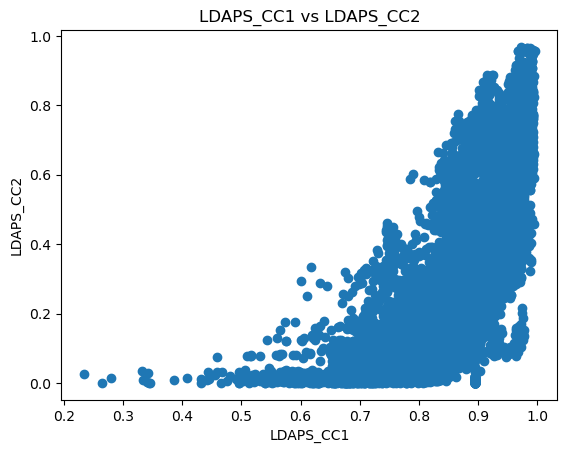

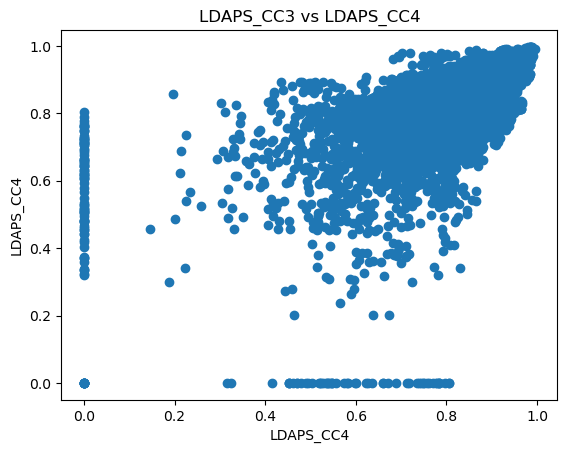

In [159]:
# for DEM and Slope 
plt.scatter(x = new_data.DEM, y= new_data.Slope)
plt.xlabel('DEM')
plt.ylabel('Slope')
plt.title('DEM vs Slope')
plt.show()

# for LDAPS_CC1 and LDAPS_CC2
plt.scatter(x = new_data.LDAPS_CC1, y= new_data.LDAPS_CC2)
plt.xlabel('LDAPS_CC1')
plt.ylabel('LDAPS_CC2')
plt.title('LDAPS_CC1 vs LDAPS_CC2')
plt.show()


# for LDAPS_CC3 and LDAPS_CC4
plt.scatter(x = new_data.LDAPS_CC4, y= new_data.LDAPS_CC3)
plt.xlabel('LDAPS_CC4')
plt.ylabel('LDAPS_CC4')
plt.title('LDAPS_CC3 vs LDAPS_CC4')
plt.show()


I can  see that DEM and Slope are correlated one directly increases one and this can cause multicollinearity problem. Same observation for LDAPS_CC1 and LDAPWS_CC2. 
But am not observing that strong direct relationship in LDAPS_CC3 AND LDAPS_CC4. 

# separating features and Targets variables 

In [161]:
x = new_data.drop(columns = ['Next_Tmax','Next_Tmin'])
y_tmax = new_data['Next_Tmax']
y_tmin = new_data['Next_Tmin']

In [163]:
# Applying standard scaler to scale the features values 
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [164]:
x_scaled.shape[1]

19

I have scaled 19 features 

# Lets check the VIF Score

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled, i) for
              i in range (x_scaled.shape[1])]
vif['features'] = x.columns 
print(vif)

         VIF          features
0   2.467183      Present_Tmax
1   2.994225      Present_Tmin
2   5.481563       LDAPS_RHmin
3   2.071806       LDAPS_RHmax
4   6.415406  LDAPS_Tmax_lapse
5   6.367709  LDAPS_Tmin_lapse
6   1.170968          LDAPS_WS
7   1.376167          LDAPS_LH
8   2.545565         LDAPS_CC1
9   3.526165         LDAPS_CC2
10  2.175435         LDAPS_CC3
11  1.746026         LDAPS_CC4
12  1.805777        LDAPS_PPT1
13  1.041539        LDAPS_PPT2
14  1.039096        LDAPS_PPT3
15  1.048975        LDAPS_PPT4
16  2.623460               DEM
17  2.613962             Slope
18  1.215847   Solar radiation


For this project am considering a vif value of 5, so any vif values > 5 will be drop. According to the above result I noticed that LDAPS_Tmax_lapse has a vif values of 6.4 and LDAPS_Tmin_lapse has vif value of 6.3. I will be dropping of them and check the vif value again. 

In [ ]:
x.drop(columns = ['LDAPS_Tmax_lapse'],axis=1,inplace=True)

In [172]:
scalar1 = StandardScaler()
x_scaled1 = scalar1.fit_transform(x)

In [176]:
new_vif = pd.DataFrame()
new_vif['VIF'] = [variance_inflation_factor(x_scaled1, i) for
              i in range (x_scaled1.shape[1])]
new_vif['features'] = x.columns 
new_vif

VIF          features
0   2.460613      Present_Tmax
1   2.989913      Present_Tmin
2   3.192621       LDAPS_RHmin
3   2.033070       LDAPS_RHmax
4   3.001956  LDAPS_Tmin_lapse
5   1.160664          LDAPS_WS
6   1.368129          LDAPS_LH
7   2.491970         LDAPS_CC1
8   3.371809         LDAPS_CC2
9   2.171568         LDAPS_CC3
10  1.744803         LDAPS_CC4
11  1.796785        LDAPS_PPT1
12  1.037499        LDAPS_PPT2
13  1.033945        LDAPS_PPT3
14  1.045572        LDAPS_PPT4
15  2.623131               DEM
16  2.612466             Slope
17  1.129525   Solar radiation

After droping LDAPS_Tmax_lapse you can see LDAPS_Tmin_lapse vif value has dropped from 6.3 to 3.0.Now all vif values are less than 5 which is very okay. 

# Spliting the data into Train and Test 

Remeber we have two targets varibales so we will be predicting for y_Tmax 

In [178]:
print(len(x),len(y_tmax),len(y_tmin))

6906 6906 6906


In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_tmax, test_size=0.25, random_state=365)
print('Preprocessing Complted')

Preprocessing Complted


# Model Building 

In [231]:
# Importing the neccessary libraries for model building 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# Linear Regression 

In [184]:
# Training Model 
lrm = LinearRegression()
lrm.fit(x_train,y_train)
print('LRM Train score:', lrm.score(x_train,y_train)*100) # checking model training score 
print('LRM Test Score:', lrm.score(x_test,y_test)*100) # checking model testing score 
lrm_pred = lrm.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,lrm_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,lrm_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,lrm_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,lrm_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':lrm_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

LRM Train score: 66.10042945685093
LRM Test Score: 71.17496984681084

MAE: 1.2469252260265695
MSE: 2.5205042999753076
RMSE: 1.5876096182548491
R2 score: 0.7117496984681084


Actual  Model Prediction
723     29.6         30.620203
935     33.3         31.003581
5034    22.2         24.419633
4447    32.4         32.584556
7645    26.7         27.636275
5826    34.0         34.665205
2249    32.7         32.014528
3387    28.1         29.753440
3641    31.2         31.504419
1521    30.1         31.252040

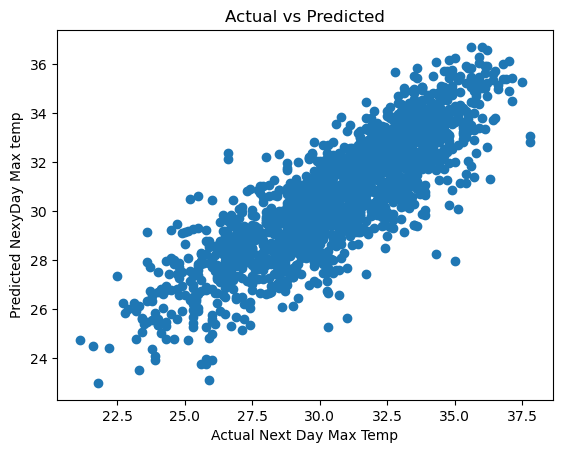

In [185]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,lrm_pred)
plt.xlabel('Actual Next Day Max Temp')
plt.ylabel('Predicted NexyDay Max temp')
plt.title('Actual vs Predicted')
plt.show()

# XGBRegressor

In [190]:
xgb = xgb.XGBRegressor() 
xgb.fit(x_train,y_train)
print('xgb Train score:', xgb.score(x_train,y_train)*100) # checking model training score 
print('xgb Test Score:', xgb.score(x_test,y_test)*100) # checking model testing score 
xgb_pred = xgb.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,xgb_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,xgb_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,xgb_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,xgb_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':xgb_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

xgb Train score: 98.78869425865244
xgb Test Score: 89.77127567023112

MAE: 0.7345553665013446
MSE: 0.8944151495915112
RMSE: 0.9457352428621402
R2 score: 0.8977127567023112


Actual  Model Prediction
723     29.6         29.935936
935     33.3         32.004120
5034    22.2         24.432665
4447    32.4         32.836700
7645    26.7         26.625269
5826    34.0         34.134098
2249    32.7         31.644417
3387    28.1         27.406761
3641    31.2         30.949959
1521    30.1         30.554707

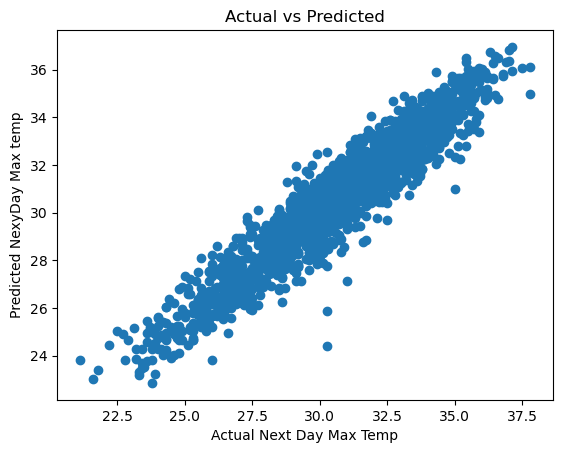

In [191]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,xgb_pred)
plt.xlabel('Actual Next Day Max Temp')
plt.ylabel('Predicted NexyDay Max temp')
plt.title('Actual vs Predicted')
plt.show()

# AdaBoostRegressor

In [192]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
print('Ada Train score:', ada.score(x_train,y_train)*100) # checking model training score 
print('Ada Test Score:', ada.score(x_test,y_test)*100) # checking model testing score 
ada_pred = ada.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,ada_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,ada_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,ada_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,ada_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':ada_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

Ada Train score: 72.56795416038419
Ada Test Score: 72.76154929768713

MAE: 1.261914621106896
MSE: 2.3817713894828034
RMSE: 1.5432988658982432
R2 score: 0.7276154929768712


Actual  Model Prediction
723     29.6         30.792302
935     33.3         30.844708
5034    22.2         25.587095
4447    32.4         31.935350
7645    26.7         27.733929
5826    34.0         34.152201
2249    32.7         31.507492
3387    28.1         29.019863
3641    31.2         30.687131
1521    30.1         31.199489

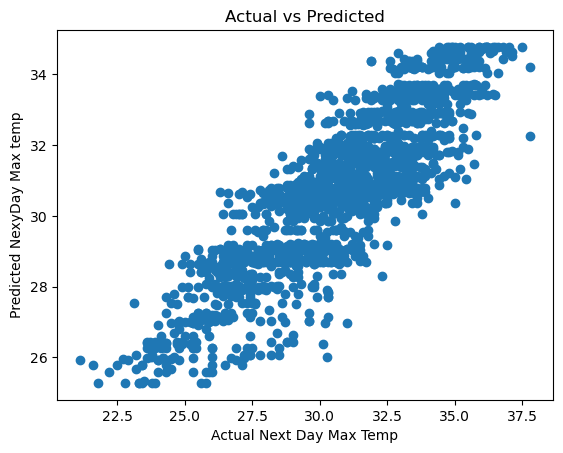

In [193]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,ada_pred)
plt.xlabel('Actual Next Day Max Temp')
plt.ylabel('Predicted NexyDay Max temp')
plt.title('Actual vs Predicted')
plt.show()

# RandomForestRegressor

In [195]:
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
print('rdr Train score:', rdr.score(x_train,y_train)*100) # checking model training score 
print('rdr Test Score:', rdr.score(x_test,y_test)*100) # checking model testing score 
rdr_pred = rdr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,rdr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,rdr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,rdr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,rdr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':rdr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

rdr Train score: 98.30283124398366
rdr Test Score: 88.13673285696298

MAE: 0.7437878450574638
MSE: 1.0373420491451721
RMSE: 1.0184999013967415
R2 score: 0.8813673285696297


Actual  Model Prediction
723     29.6         29.745000
935     33.3         32.422749
5034    22.2         22.845000
4447    32.4         32.210247
7645    26.7         26.861000
5826    34.0         34.458000
2249    32.7         31.512000
3387    28.1         28.045000
3641    31.2         31.831000
1521    30.1         29.780749

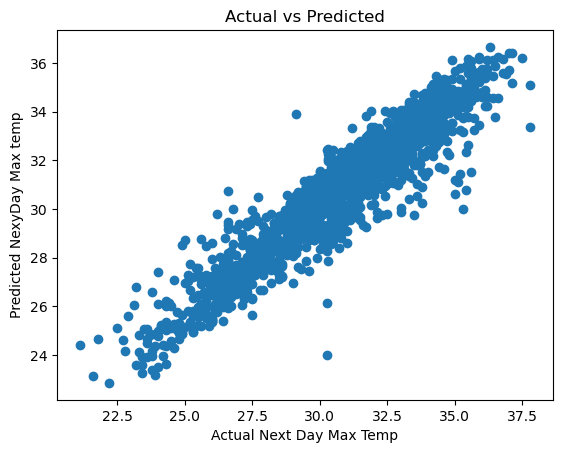

In [196]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,rdr_pred)
plt.xlabel('Actual Next Day Max Temp')
plt.ylabel('Predicted NexyDay Max temp')
plt.title('Actual vs Predicted')
plt.show()

# ExtraTreesRegressor

In [198]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
print('etr Train score:', etr.score(x_train,y_train)*100) # checking model training score 
print('etr Test Score:', etr.score(x_test,y_test)*100) # checking model testing score 
etr_pred = etr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,etr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,etr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,etr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,etr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':etr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)


etr Train score: 100.0
etr Test Score: 90.81743074628803

MAE: 0.6664277222787518
MSE: 0.8029377650535218
RMSE: 0.8960679466723055
R2 score: 0.9081743074628803


Actual  Model Prediction
723     29.6         29.704000
935     33.3         32.826000
5034    22.2         22.469000
4447    32.4         32.241749
7645    26.7         26.919000
5826    34.0         34.408000
2249    32.7         31.535749
3387    28.1         27.818000
3641    31.2         30.915498
1521    30.1         29.818000

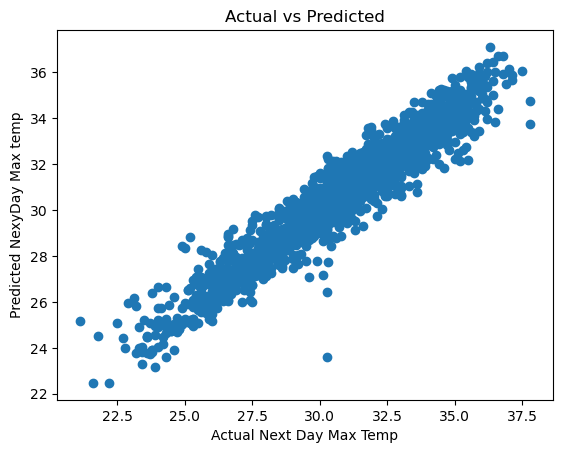

In [199]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,etr_pred)
plt.xlabel('Actual Next Day Max Temp')
plt.ylabel('Predicted NexyDay Max temp')
plt.title('Actual vs Predicted')
plt.show()

# GradientBoostingRegressor

In [205]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print('gbr Train score:', gbr.score(x_train,y_train)*100) # checking model training score 
print('gbr Test Score:', gbr.score(x_test,y_test)*100) # checking model testing score 
gbr_pred = gbr.predict(x_test) # using model to predict on x_test 

print('\nError:')
print('\nMAE:',mean_absolute_error(y_test,gbr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,gbr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,gbr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,etr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':gbr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

gbr Train score: 82.61019765009061
gbr Test Score: 81.36433721220794

Error:

MAE: 1.0072278864315705
MSE: 1.6295305829653361
RMSE: 1.2765306823438818
R2 score: 0.9081743074628803


Actual  Model Prediction
723     29.6         30.498222
935     33.3         31.501058
5034    22.2         24.557663
4447    32.4         32.336843
7645    26.7         27.095748
5826    34.0         34.825065
2249    32.7         31.904266
3387    28.1         28.787111
3641    31.2         31.260846
1521    30.1         30.630351

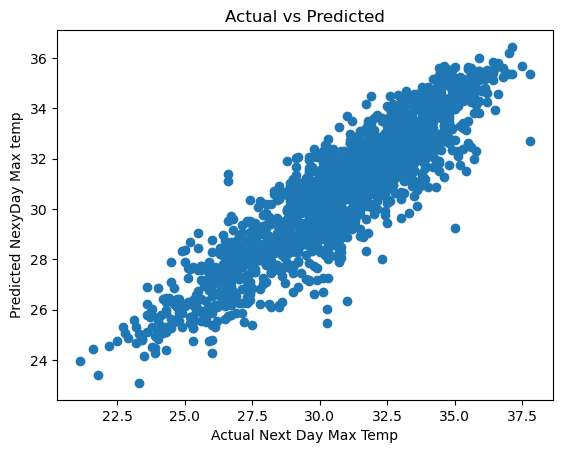

In [203]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,gbr_pred)
plt.xlabel('Actual Next Day Max Temp')
plt.ylabel('Predicted NexyDay Max temp')
plt.title('Actual vs Predicted')
plt.show()

# Support Vector Machine Regressor

In [204]:
svr = SVR() # initializing model 
svr.fit(x_train,y_train) # Training model
print('svr Train score:', svr.score(x_train,y_train)*100) # checking model training score 
print('svr Test Score:', svr.score(x_test,y_test)*100) # checking model testing score 
svr_pred = svr.predict(x_test) # using model to predict on x_test 

print('\nError:')
print('\nMAE:',mean_absolute_error(y_test,svr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,svr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,svr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,svr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':svr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)


svr Train score: 2.967061069187016
svr Test Score: 3.2732183406403936

Error:

MAE: 2.340942824519671
MSE: 8.457936307421864
RMSE: 2.908253136750971
R2 score: 0.032732183406403936


Actual  Model Prediction
723     29.6         30.779381
935     33.3         30.856316
5034    22.2         30.578679
4447    32.4         30.732878
7645    26.7         30.628349
5826    34.0         30.843945
2249    32.7         30.798200
3387    28.1         30.543467
3641    31.2         30.690089
1521    30.1         30.480577

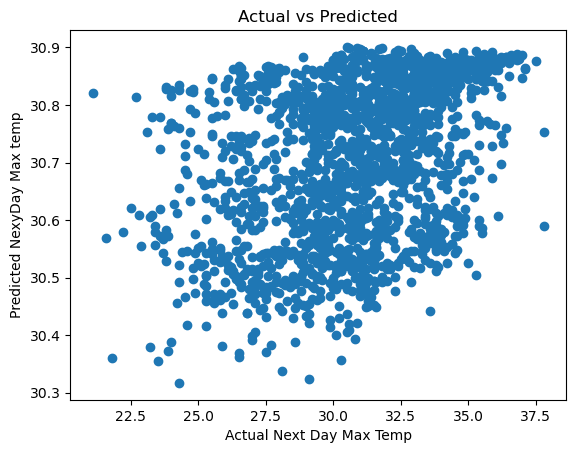

In [210]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,svr_pred)
plt.xlabel('Actual Next Day Max Temp')
plt.ylabel('Predicted NexyDay Max temp')
plt.title('Actual vs Predicted')
plt.show()

svr model performance very low, we can tell from the graph, there is no trend 

Extra Tree is our best model. It has the highest training score: 100%,  testing score: 90%, Errors: 0%, R2: 90%   

## Reqularization Techinques (Using LassoCV to check model accuracy and overfitting)


In [206]:
# Lets see if our model is overfitting by using the regularization techniques 
lasscv = LassoCV(alphas = None, max_iter =10) # performing  10 cross validation 
lasscv.fit(x_train,y_train)# model get trained 

LassoCV(max_iter=10)

In [207]:
# Best alpha parameter rate 
alpha = lasscv.alpha_
print('Best parameter rate:', alpha)

Best parameter rate: 0.03458010067868285


In [220]:
# Using lasso regression to see how well our model has fitted 
lsr = Lasso(alpha)
lsr.fit(x_train,y_train)
print('lsr Train score:', lsr.score(x_train,y_train)*100) 
print('lsr Test Score:', lsr.score(x_test,y_test)*100) 
lsr_pred = lsr.predict(x_test)
print('R2 score:', r2_score(y_test,lsr_pred))

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':lsr_pred})
df_pred.head(10)

lsr Train score: 62.578507005921445
lsr Test Score: 67.09789545321915
R2 score: 0.6709789545321916


Actual  Model Prediction
723     29.6         30.550726
935     33.3         30.610488
5034    22.2         24.819100
4447    32.4         32.096225
7645    26.7         28.445116
5826    34.0         34.133339
2249    32.7         32.011867
3387    28.1         29.817638
3641    31.2         30.768344
1521    30.1         31.040278

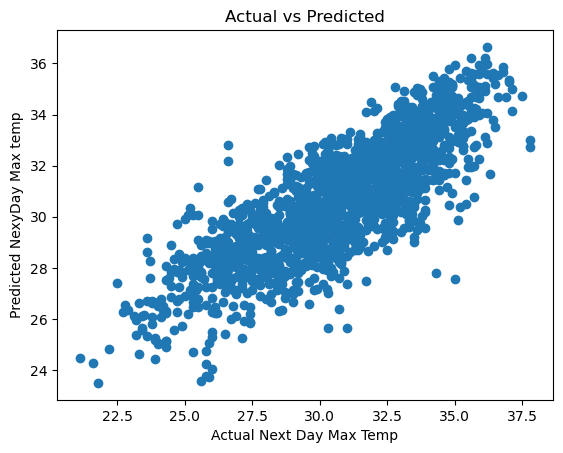

In [221]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,lsr_pred)
plt.xlabel('Actual Next Day Max Temp')
plt.ylabel('Predicted NexyDay Max temp')
plt.title('Actual vs Predicted')
plt.show()

Lasso model performance is low compare to our best model Extra Tree but almost has same score with Linear Regression

# Ridge Regression Model 

In [222]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01)) # Returning best alpha and coefficient after performing 10 cross validation
ridgecv.fit(x_train,y_train)
print('Best alpha and coe:',ridgecv.alpha_)
print('ridge Train score:', ridgecv.score(x_train,y_train)*100) 
print('ridge Test Score:', ridgecv.score(x_test,y_test)*100) 
rgr_pred = ridgecv.predict(x_test)
print('R2 score:', r2_score(y_test,rgr_pred))
df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':rgr_pred})
df_pred.head(10)

Best alpha and coe: 0.09099999999999998
ridge Train score: 66.09953807139703
ridge Test Score: 71.17227790552565
R2 score: 0.7117227790552565


Actual  Model Prediction
723     29.6         30.615901
935     33.3         30.993260
5034    22.2         24.430183
4447    32.4         32.588624
7645    26.7         27.641990
5826    34.0         34.662250
2249    32.7         32.004811
3387    28.1         29.760583
3641    31.2         31.486039
1521    30.1         31.249304

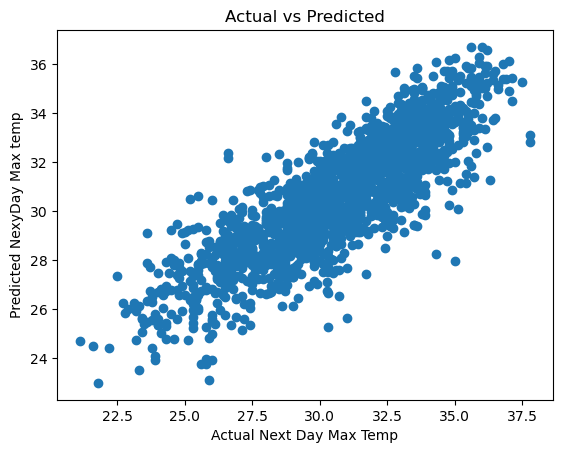

In [223]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,rgr_pred)
plt.xlabel('Actual Next Day Max Temp')
plt.ylabel('Predicted NexyDay Max temp')
plt.title('Actual vs Predicted')
plt.show()

RidgeCV model performance is okay but our best model remain Extra Tree Regressor. 

# Saving Best Model ExtraTreeRegressor 

In [252]:
import pickle
filename='Temperature_Forcast_Project__Tmax_Regression.pkl'
pickle.dump(etr,open(filename,'wb'))

# Predicting with save model 

In [254]:
actual=np.array(y_test)
predicted= np.array(etr.predict(x_test))
df_com= pd.DataFrame({'Actual':actual, 'predicted':predicted}, index= range(len(actual)))
df_com

Actual  predicted
0       24.5  24.504000
1       24.6  24.459000
2       19.4  19.452000
3       23.0  23.233000
4       20.5  19.356000
...      ...        ...
1722    27.4  26.990000
1723    24.8  25.290000
1724    23.8  23.852000
1725    23.0  20.404000
1726    22.9  22.682967

[1727 rows x 2 columns]

# Predicting Next day Minimum Temperature

In [225]:
x_train, x_test, y_train, y_test = train_test_split(x, y_tmin, test_size=0.25, random_state=365)

# Linear Regression 

In [229]:
# Training Model 
lrm = LinearRegression()
lrm.fit(x_train,y_train)
print('LRM Train score:', lrm.score(x_train,y_train)*100) # checking model training score 
print('LRM Test Score:', lrm.score(x_test,y_test)*100) # checking model testing score 
lrm_pred = lrm.predict(x_test) # using model to predict on x_test data

print('\nModel Errors:')
print('\nMAE:',mean_absolute_error(y_test,lrm_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,lrm_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,lrm_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,lrm_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':lrm_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

LRM Train score: 81.12365389683967
LRM Test Score: 80.7161369394602

Model Errors:

MAE: 0.8005635470731111
MSE: 1.0682072489019767
RMSE: 1.0335411210503318
R2 score: 0.807161369394602


Actual  Model Prediction
723     24.5         24.141829
935     24.6         23.663927
5034    19.4         19.533943
4447    23.0         23.348585
7645    20.5         19.506350
5826    23.9         24.755078
2249    22.1         22.692945
3387    24.0         25.100752
3641    23.2         23.105366
1521    22.7         23.505604

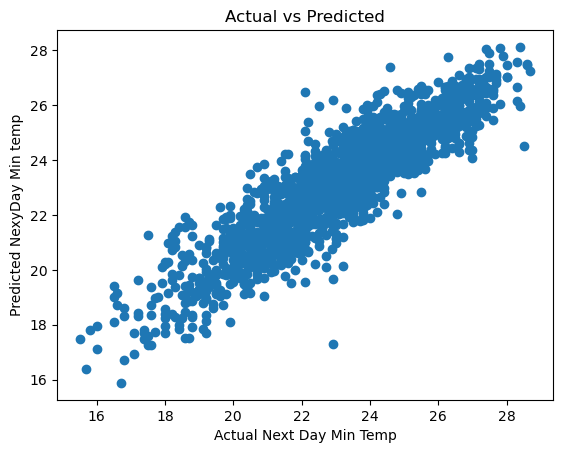

In [242]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,lrm_pred)
plt.xlabel('Actual Next Day Min Temp')
plt.ylabel('Predicted NexyDay Min temp')
plt.title('Actual vs Predicted')
plt.show()

model performing very well, Accuracy score is 80%. The above prediction graph between Actual and model predicted shows there is positve trend  between prediction.

# XGBRegressor

In [232]:
xgb = xgb.XGBRegressor() 
xgb.fit(x_train,y_train)
print('xgb Train score:', xgb.score(x_train,y_train)*100) # checking model training score 
print('xgb Test Score:', xgb.score(x_test,y_test)*100) # checking model testing score 
xgb_pred = xgb.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,xgb_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,xgb_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,xgb_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,xgb_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':xgb_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

xgb Train score: 99.03557116418173
xgb Test Score: 90.98374877018458

MAE: 0.5252490131664403
MSE: 0.4994447892195618
RMSE: 0.7067140788321411
R2 score: 0.9098374877018458


Actual  Model Prediction
723     24.5         24.689705
935     24.6         24.262157
5034    19.4         19.811045
4447    23.0         23.630951
7645    20.5         20.306152
5826    23.9         24.359198
2249    22.1         22.747982
3387    24.0         24.528320
3641    23.2         23.180721
1521    22.7         23.185038

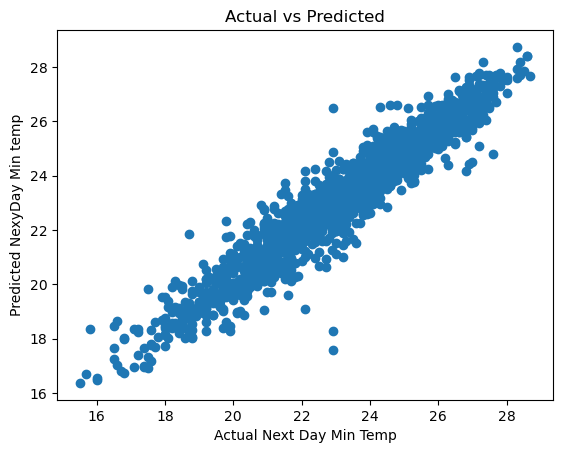

In [241]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,xgb_pred)
plt.xlabel('Actual Next Day Min Temp')
plt.ylabel('Predicted NexyDay Min temp')
plt.title('Actual vs Predicted')
plt.show()

Model accuracy is high on Next day min Temp compare to the accuracy in same model next day max tem. I will say model performing very well again compare to linear Regression.

# AdaBoostRegressor

In [234]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
print('Ada Train score:', ada.score(x_train,y_train)*100) # checking model training score 
print('Ada Test Score:', ada.score(x_test,y_test)*100) # checking model testing score 
ada_pred = ada.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,ada_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,ada_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,ada_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,ada_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':ada_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

Ada Train score: 79.93281379771713
Ada Test Score: 78.44806775191667

MAE: 0.8798902070439594
MSE: 1.1938443134019259
RMSE: 1.0926318288435157
R2 score: 0.7844806775191666


Actual  Model Prediction
723     24.5         23.539668
935     24.6         23.615275
5034    19.4         19.192779
4447    23.0         22.825849
7645    20.5         18.810169
5826    23.9         24.672802
2249    22.1         22.504941
3387    24.0         25.202792
3641    23.2         22.768813
1521    22.7         22.935947

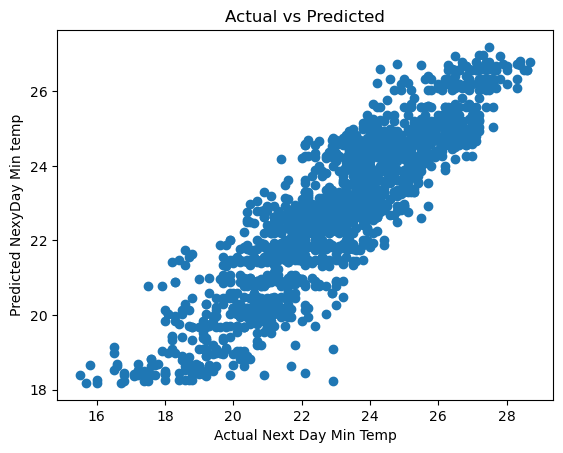

In [240]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,ada_pred)
plt.xlabel('Actual Next Day Min Temp')
plt.ylabel('Predicted NexyDay Min temp')
plt.title('Actual vs Predicted')
plt.show()

# RandomForestRegressor

In [237]:
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
print('rdr Train score:', rdr.score(x_train,y_train)*100) # checking model training score 
print('rdr Test Score:', rdr.score(x_test,y_test)*100) # checking model testing score 
rdr_pred = rdr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,rdr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,rdr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,rdr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,rdr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':rdr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

rdr Train score: 98.45358244669275
rdr Test Score: 87.71444085005659

MAE: 0.6184609672009193
MSE: 0.6805443131173219
RMSE: 0.8249510974096113
R2 score: 0.877144408500566


Actual  Model Prediction
723     24.5         24.586000
935     24.6         24.442000
5034    19.4         19.256000
4447    23.0         23.383644
7645    20.5         19.374000
5826    23.9         24.466000
2249    22.1         22.476000
3387    24.0         23.953000
3641    23.2         22.908000
1521    22.7         23.614644

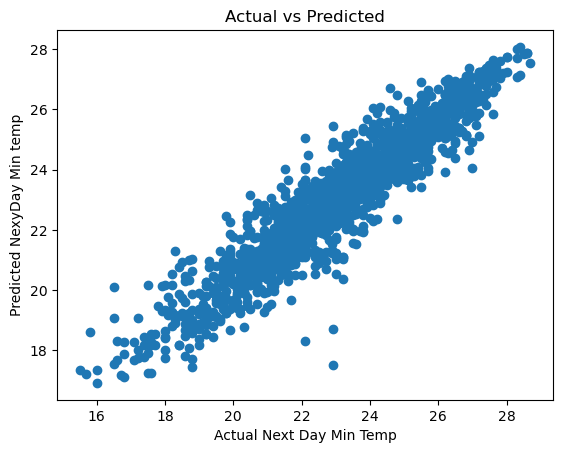

In [243]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,rdr_pred)
plt.xlabel('Actual Next Day Min Temp')
plt.ylabel('Predicted NexyDay Min temp')
plt.title('Actual vs Predicted')
plt.show()

 # ExtraTreesRegressor

In [244]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
print('etr Train score:', etr.score(x_train,y_train)*100) # checking model training score 
print('etr Test Score:', etr.score(x_test,y_test)*100) # checking model testing score 
etr_pred = etr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,etr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,etr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,etr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,etr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':etr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

etr Train score: 99.9999999930257
etr Test Score: 88.41040010623533

MAE: 0.5929077473891721
MSE: 0.6419924565698741
RMSE: 0.8012443176521592
R2 score: 0.8841040010623533


Actual  Model Prediction
723     24.5         24.504000
935     24.6         24.459000
5034    19.4         19.452000
4447    23.0         23.233000
7645    20.5         19.356000
5826    23.9         24.697000
2249    22.1         22.419000
3387    24.0         23.896000
3641    23.2         23.151644
1521    22.7         23.446544

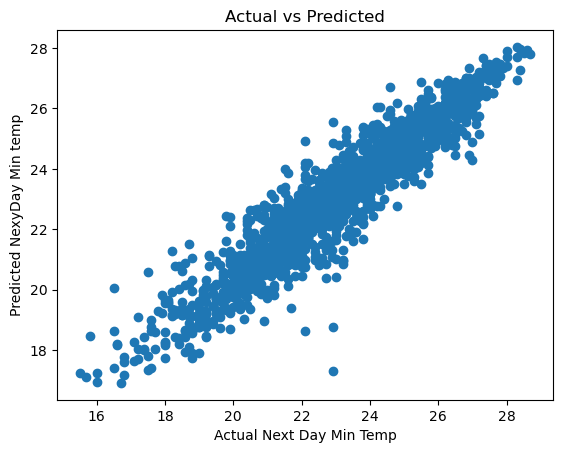

In [245]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,etr_pred)
plt.xlabel('Actual Next Day Min Temp')
plt.ylabel('Predicted NexyDay Min temp')
plt.title('Actual vs Predicted')
plt.show()

# GradientBoostingRegressor

In [246]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print('gbr Train score:', gbr.score(x_train,y_train)*100) # checking model training score 
print('gbr Test Score:', gbr.score(x_test,y_test)*100) # checking model testing score 
gbr_pred = gbr.predict(x_test) # using model to predict on x_test 

print('\nError:')
print('\nMAE:',mean_absolute_error(y_test,gbr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,gbr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,gbr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,etr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':gbr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

gbr Train score: 89.52554929575882
gbr Test Score: 86.46267701012304

Error:

MAE: 0.6627102321316787
MSE: 0.7498843205386855
RMSE: 0.8659586136407937
R2 score: 0.8841040010623533


Actual  Model Prediction
723     24.5         24.528970
935     24.6         23.902443
5034    19.4         19.710929
4447    23.0         23.418462
7645    20.5         19.333817
5826    23.9         24.566842
2249    22.1         22.639098
3387    24.0         24.439314
3641    23.2         22.885200
1521    22.7         23.406808

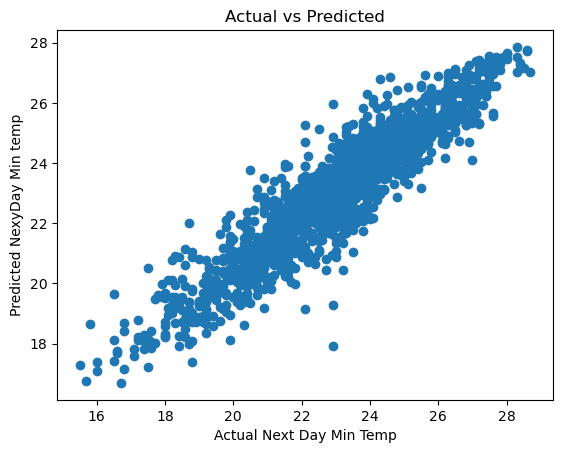

In [247]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,gbr_pred)
plt.xlabel('Actual Next Day Min Temp')
plt.ylabel('Predicted NexyDay Min temp')
plt.title('Actual vs Predicted')
plt.show()

# SVR

In [248]:
svr = SVR() # initializing model 
svr.fit(x_train,y_train) # Training model
print('svr Train score:', svr.score(x_train,y_train)*100) # checking model training score 
print('svr Test Score:', svr.score(x_test,y_test)*100) # checking model testing score 
svr_pred = svr.predict(x_test) # using model to predict on x_test 

print('\nError:')
print('\nMAE:',mean_absolute_error(y_test,svr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,svr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,svr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,svr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':svr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

svr Train score: 8.80028450577064
svr Test Score: 8.485716760753448

Error:

MAE: 1.7827394999940225
MSE: 5.069327677101613
RMSE: 2.251516750348887
R2 score: 0.08485716760753448


Actual  Model Prediction
723     24.5         23.415691
935     24.6         23.400334
5034    19.4         23.293212
4447    23.0         22.877969
7645    20.5         22.627741
5826    23.9         23.152990
2249    22.1         23.399857
3387    24.0         23.260170
3641    23.2         23.348873
1521    22.7         22.361662

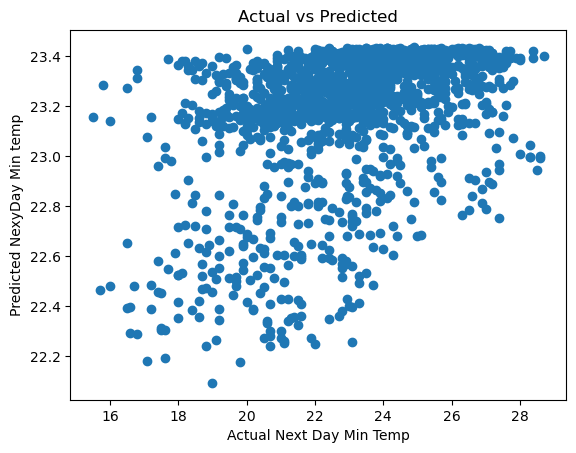

In [249]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,svr_pred)
plt.xlabel('Actual Next Day Min Temp')
plt.ylabel('Predicted NexyDay Min temp')
plt.title('Actual vs Predicted')
plt.show()

Very low performance 

# Ridgecv Model 

In [250]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01)) # Returning best alpha and coefficient after performing 10 cross validation
ridgecv.fit(x_train,y_train)
print('Best alpha and coe:',ridgecv.alpha_)
print('ridge Train score:', ridgecv.score(x_train,y_train)*100) 
print('ridge Test Score:', ridgecv.score(x_test,y_test)*100) 
rgr_pred = ridgecv.predict(x_test)
print('R2 score:', r2_score(y_test,rgr_pred))
df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':rgr_pred})
df_pred.head(10)

Best alpha and coe: 0.09099999999999998
ridge Train score: 81.1232254383489
ridge Test Score: 80.71734461845658
R2 score: 0.8071734461845658


Actual  Model Prediction
723     24.5         24.135373
935     24.6         23.659719
5034    19.4         19.537050
4447    23.0         23.354118
7645    20.5         19.512771
5826    23.9         24.755636
2249    22.1         22.687145
3387    24.0         25.103361
3641    23.2         23.103109
1521    22.7         23.499464

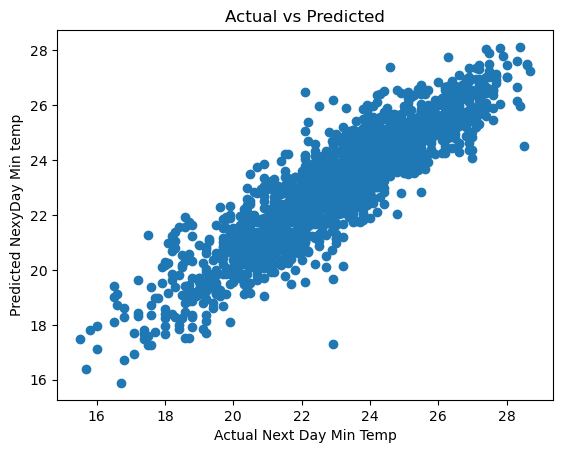

In [251]:
#Visualizing Actual Next day Max Temp  and model prediction 
plt.scatter(y_test,rgr_pred)
plt.xlabel('Actual Next Day Min Temp')
plt.ylabel('Predicted NexyDay Min temp')
plt.title('Actual vs Predicted')
plt.show()

# XGBRegressor is our best model with accuracy score of 90% and 0% errors. Training score:99%, Test score 90%. 

# Saving Model 

In [255]:
import pickle
filename='Temperature_Forcast_Project__Tmin_Regression.pkl'
pickle.dump(xgb,open(filename,'wb'))

In [256]:
actual=np.array(y_test)
predicted= np.array(xgb.predict(x_test))
df_com= pd.DataFrame({'Actual':actual, 'predicted':predicted}, index= range(len(actual)))
df_com

Actual  predicted
0       24.5  24.689705
1       24.6  24.262157
2       19.4  19.811045
3       23.0  23.630951
4       20.5  20.306152
...      ...        ...
1722    27.4  26.654881
1723    24.8  24.743420
1724    23.8  23.670532
1725    23.0  21.127100
1726    22.9  22.757235

[1727 rows x 2 columns]

# Thank You